In [138]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.font_manager as fm

In [139]:
df = pd.read_csv("C:/Users/keats/OneDrive/Î∞îÌÉï ÌôîÎ©¥/total_sales.csv")
df.head()

Í≥†Í∞ùID              Í±∞ÎûòID        Í±∞ÎûòÎÇ†Ïßú          Ï†úÌíàID    Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨  ÏàòÎüâ  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     ÌèâÍ∑†Í∏àÏï°  Î∞∞ÏÜ°Î£å      Ïø†Ìè∞ÏÉÅÌÉú ÏÑ±Î≥Ñ     Í≥†Í∞ùÏßÄÏó≠  Í∞ÄÏûÖÍ∏∞Í∞Ñ    Ïø†Ìè∞ÏΩîÎìú   Ìï†Ïù∏Ïú®    Ìï†Ïù∏Í∏àÏï°      Îß§Ï∂ú  \
0  153.71  6.5      Used  ÎÇ®  Chicago    12  ELEC10  10.0  15.371  153.71   
1  153.71  6.5      Used  ÎÇ®  Chicago    12  ELEC10  10.0  15.371  153.71   
2    2.05  6.5      Used  ÎÇ®  Chicago    12   OFF10  10.0   0.205    2.05   
3   17.53  6.5  Not Used  ÎÇ®  Chicago    12  SALE10  10.0   0.000   87.65   
4   16.50  0.0      Used  ÎÇ®  Chicago    12   AIO10  10.0   1.650   16.50   

        ÏàòÏùµ    Ï¥ù Îß§Ï∂ú  
0  138.339  160.21  
1  138.339  160.21  
2    1.845    8.55  
3   87.650   94.15  
4   14.850   16.50

In [140]:
df.describe()

ÏàòÎüâ          ÌèâÍ∑†Í∏àÏï°           Î∞∞ÏÜ°Î£å          Í∞ÄÏûÖÍ∏∞Í∞Ñ           Ìï†Ïù∏Ïú®  \
count  52924.000000  52924.000000  52924.000000  52924.000000  52924.000000   
mean       4.497638     52.237646      4.166770     26.127995     19.802358   
std       20.104711     64.006882     10.499075     13.478285      8.278878   
min        1.000000      0.390000      0.000000      2.000000      0.000000   
25%        1.000000      5.700000      0.000000     15.000000     10.000000   
50%        1.000000     16.990000      0.000000     27.000000     20.000000   
75%        2.000000    102.130000      6.000000     37.000000     30.000000   
max      900.000000    355.740000    521.360000     50.000000     30.000000   

               Ìï†Ïù∏Í∏àÏï°            Îß§Ï∂ú            ÏàòÏùµ          Ï¥ù Îß§Ï∂ú  
count  52924.000000  52924.000000  52924.000000  52924.000000  
mean       5.872052     88.254754     82.382703     92.421524  
std       21.266244    163.993178    154.315592    165.845843  
min        0.000000      0.400000      0.287000      0.400000  
25%        0.000000     11.960000     10.872000     13.590000  
50%        0.000000     30.390000     28.144000     34.000000  
75%        1.902000    121.300000    119.000000    127.800000  
max     2102.478000  10512.390000   8545.500000  10512.390000

In [141]:
df['Í≥†Í∞ùID'].nunique()

1468

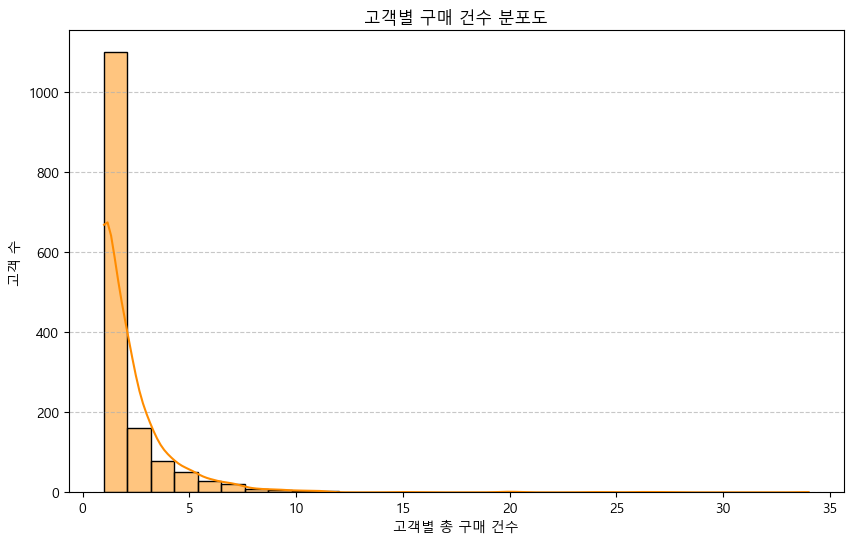

In [164]:
# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í∞ôÏùÄ Í≥†Í∞ùÏùò Í∞ôÏùÄ ÎÇ† Í±∞ÎûòÎ•º 1Í±¥ÏúºÎ°ú Í∞ÑÏ£º
unique_orders = df.groupby(['Í≥†Í∞ùID', 'Í±∞ÎûòÎÇ†Ïßú'])['Í±∞ÎûòID'].nunique().reset_index()

# Í≥†Í∞ùÎ≥Ñ Ï¥ù Íµ¨Îß§ Í±¥Ïàò Í≥ÑÏÇ∞
customer_purchase_counts = unique_orders.groupby('Í≥†Í∞ùID')['Í±∞ÎûòID'].count().reset_index()
customer_purchase_counts.rename(columns={'Í±∞ÎûòID': 'Íµ¨Îß§Í±¥Ïàò'}, inplace=True)

# ÌûàÏä§ÌÜ†Í∑∏Îû®(Î∂ÑÌè¨ÎèÑ) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_counts['Íµ¨Îß§Í±¥Ïàò'], bins=30, kde=True, color='darkorange')
plt.xlabel("Í≥†Í∞ùÎ≥Ñ Ï¥ù Íµ¨Îß§ Í±¥Ïàò")
plt.ylabel("Í≥†Í∞ù Ïàò")
plt.title("Í≥†Í∞ùÎ≥Ñ Íµ¨Îß§ Í±¥Ïàò Î∂ÑÌè¨ÎèÑ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



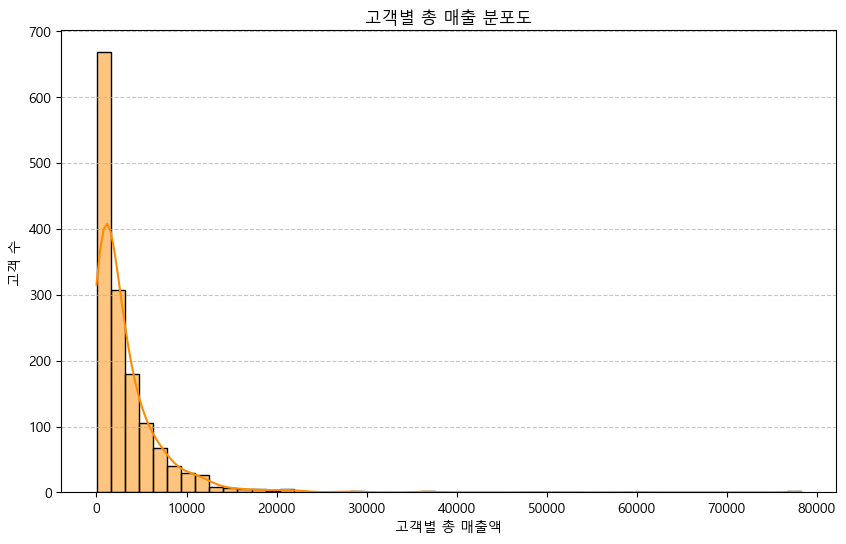

In [159]:

# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í∞ôÏùÄ Í≥†Í∞ùÏùò Í∞ôÏùÄ ÎÇ† Í±∞ÎûòÎ•º 1Í±¥ÏúºÎ°ú Í∞ÑÏ£ºÌïòÏó¨ Ï¥ù Îß§Ï∂ú Í≥ÑÏÇ∞
unique_sales = df.groupby(['Í≥†Í∞ùID', 'Í±∞ÎûòÎÇ†Ïßú'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Í≥†Í∞ùÎ≥Ñ Ï¥ù Îß§Ï∂ú Í≥ÑÏÇ∞
customer_total_sales = unique_sales.groupby('Í≥†Í∞ùID')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# ÌûàÏä§ÌÜ†Í∑∏Îû®(Î∂ÑÌè¨ÎèÑ) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.histplot(customer_total_sales['Ï¥ù Îß§Ï∂ú'], bins=50, kde=True, color='darkorange')
plt.xlabel("Í≥†Í∞ùÎ≥Ñ Ï¥ù Îß§Ï∂úÏï°")
plt.ylabel("Í≥†Í∞ù Ïàò")
plt.title("Í≥†Í∞ùÎ≥Ñ Ï¥ù Îß§Ï∂ú Î∂ÑÌè¨ÎèÑ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


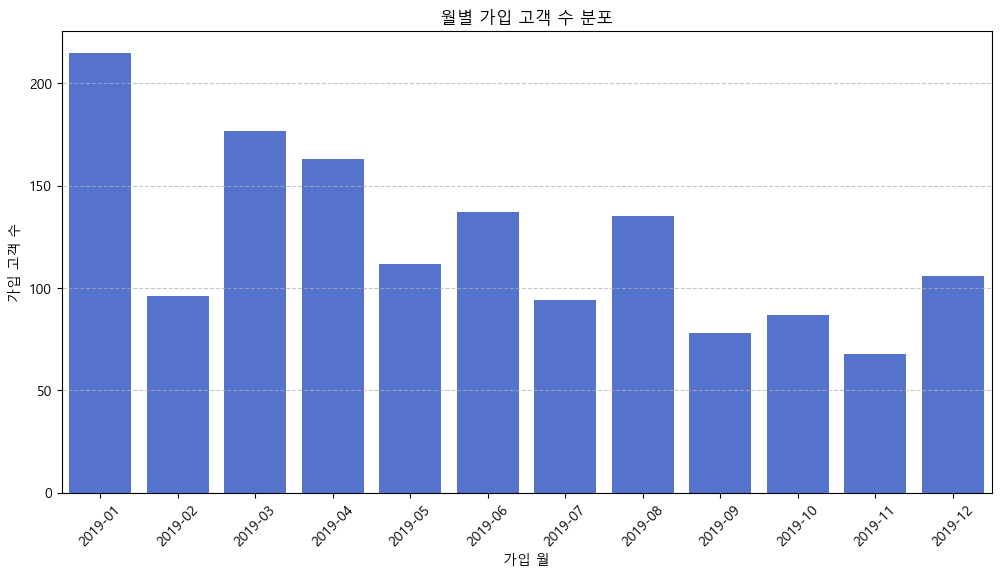

In [170]:
# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï≤´ Í±∞ÎûòÏùº Ï∞æÍ∏∞
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´ Í±∞ÎûòÏùº'}, inplace=True)

# Ï≤´ Í±∞ÎûòÍ∞Ä Î∞úÏÉùÌïú Ïõî Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
first_purchase['Í∞ÄÏûÖÏõî'] = first_purchase['Ï≤´ Í±∞ÎûòÏùº'].dt.to_period('M')  # Ïõî Îã®ÏúÑ Î≥ÄÌôò

# ÏõîÎ≥Ñ Í∞ÄÏûÖ Í≥†Í∞ù Ïàò ÏßëÍ≥Ñ
monthly_signups = first_purchase.groupby('Í∞ÄÏûÖÏõî')['Í≥†Í∞ùID'].count().reset_index()
monthly_signups.rename(columns={'Í≥†Í∞ùID': 'Í∞ÄÏûÖ Í≥†Í∞ù Ïàò'}, inplace=True)

# ÌûàÏä§ÌÜ†Í∑∏Îû® ÎåÄÏã† ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÇ¨Ïö© (ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú)
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_signups, x=monthly_signups['Í∞ÄÏûÖÏõî'].astype(str), y='Í∞ÄÏûÖ Í≥†Í∞ù Ïàò', color='royalblue')
plt.xlabel("Í∞ÄÏûÖ Ïõî")
plt.ylabel("Í∞ÄÏûÖ Í≥†Í∞ù Ïàò")
plt.title("ÏõîÎ≥Ñ Í∞ÄÏûÖ Í≥†Í∞ù Ïàò Î∂ÑÌè¨")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



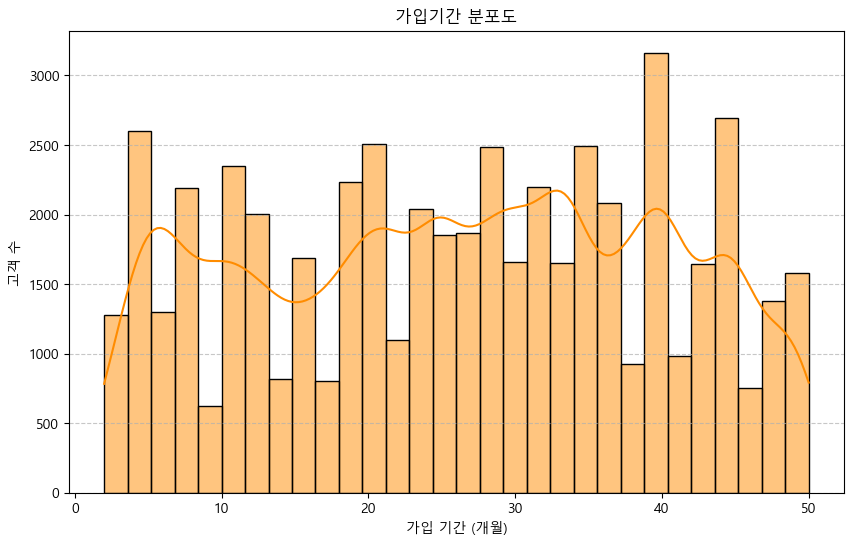

In [169]:
# Í∞ÄÏûÖÍ∏∞Í∞Ñ(Í∞úÏõî) Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ ÌõÑ Î∂ÑÌè¨ÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.histplot(df['Í∞ÄÏûÖÍ∏∞Í∞Ñ'], bins=30, kde=True, color='darkorange')
plt.xlabel("Í∞ÄÏûÖ Í∏∞Í∞Ñ (Í∞úÏõî)")
plt.ylabel("Í≥†Í∞ù Ïàò")
plt.title("Í∞ÄÏûÖÍ∏∞Í∞Ñ Î∂ÑÌè¨ÎèÑ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

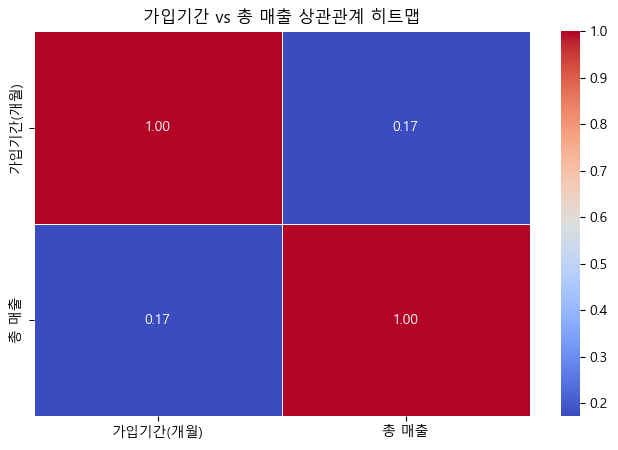

In [172]:

# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï≤´ Í±∞ÎûòÏùº Ï∞æÍ∏∞
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´ Í±∞ÎûòÏùº'}, inplace=True)

# ÏµúÏã† Í±∞ÎûòÏùºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏûÖÍ∏∞Í∞Ñ(Í∞úÏõî) Í≥ÑÏÇ∞
latest_date = df['Í±∞ÎûòÎÇ†Ïßú'].max()
first_purchase['Í∞ÄÏûÖÍ∏∞Í∞Ñ(Í∞úÏõî)'] = ((latest_date - first_purchase['Ï≤´ Í±∞ÎûòÏùº']).dt.days) // 30  # ÏùºÏàòÎ•º Í∞úÏõîÎ°ú Î≥ÄÌôò

# Í≥†Í∞ùÎ≥Ñ Ï¥ù Îß§Ï∂ú(Ï§ëÎ≥µ Í±∞Îûò Ï†úÍ±∞: Í∞ôÏùÄ ÎÇ†ÏßúÏùò Ïó¨Îü¨ Í±∞ÎûòIDÎäî 1Í±¥ÏúºÎ°ú Í∞ÑÏ£º)
unique_sales = df.groupby(['Í≥†Í∞ùID', 'Í±∞ÎûòÎÇ†Ïßú'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Í≥†Í∞ùÎ≥Ñ Ï¥ù Îß§Ï∂ú ÏßëÍ≥Ñ
customer_total_sales = unique_sales.groupby('Í≥†Í∞ùID')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Í∞ÄÏûÖÍ∏∞Í∞ÑÍ≥º Ï¥ù Îß§Ï∂ú Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df_corr = first_purchase.merge(customer_total_sales, on='Í≥†Í∞ùID', how='left')

# ÏÉÅÍ¥ÄÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = df_corr[['Í∞ÄÏûÖÍ∏∞Í∞Ñ(Í∞úÏõî)', 'Ï¥ù Îß§Ï∂ú']].corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Í∞ÄÏûÖÍ∏∞Í∞Ñ vs Ï¥ù Îß§Ï∂ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ")
plt.show()



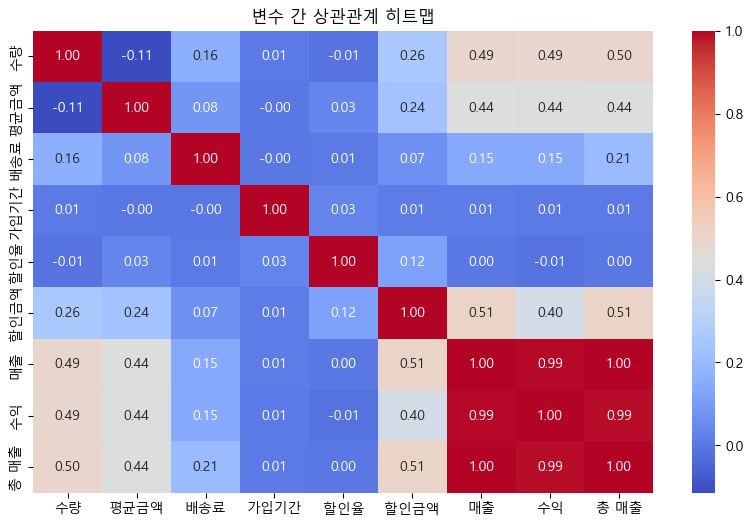

In [142]:
df_numeric = df.select_dtypes(include=['number'])  # Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
corr_matrix = df_numeric.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ")
plt.show()

In [143]:
from scipy.stats import skew, kurtosis
print("ÏôúÎèÑ:", skew(df['Ï¥ù Îß§Ï∂ú']))
print("Ï≤®ÎèÑ:", kurtosis(df['Ï¥ù Îß§Ï∂ú']))

ÏôúÎèÑ: 18.181324918450283
Ï≤®ÎèÑ: 763.2549196230262


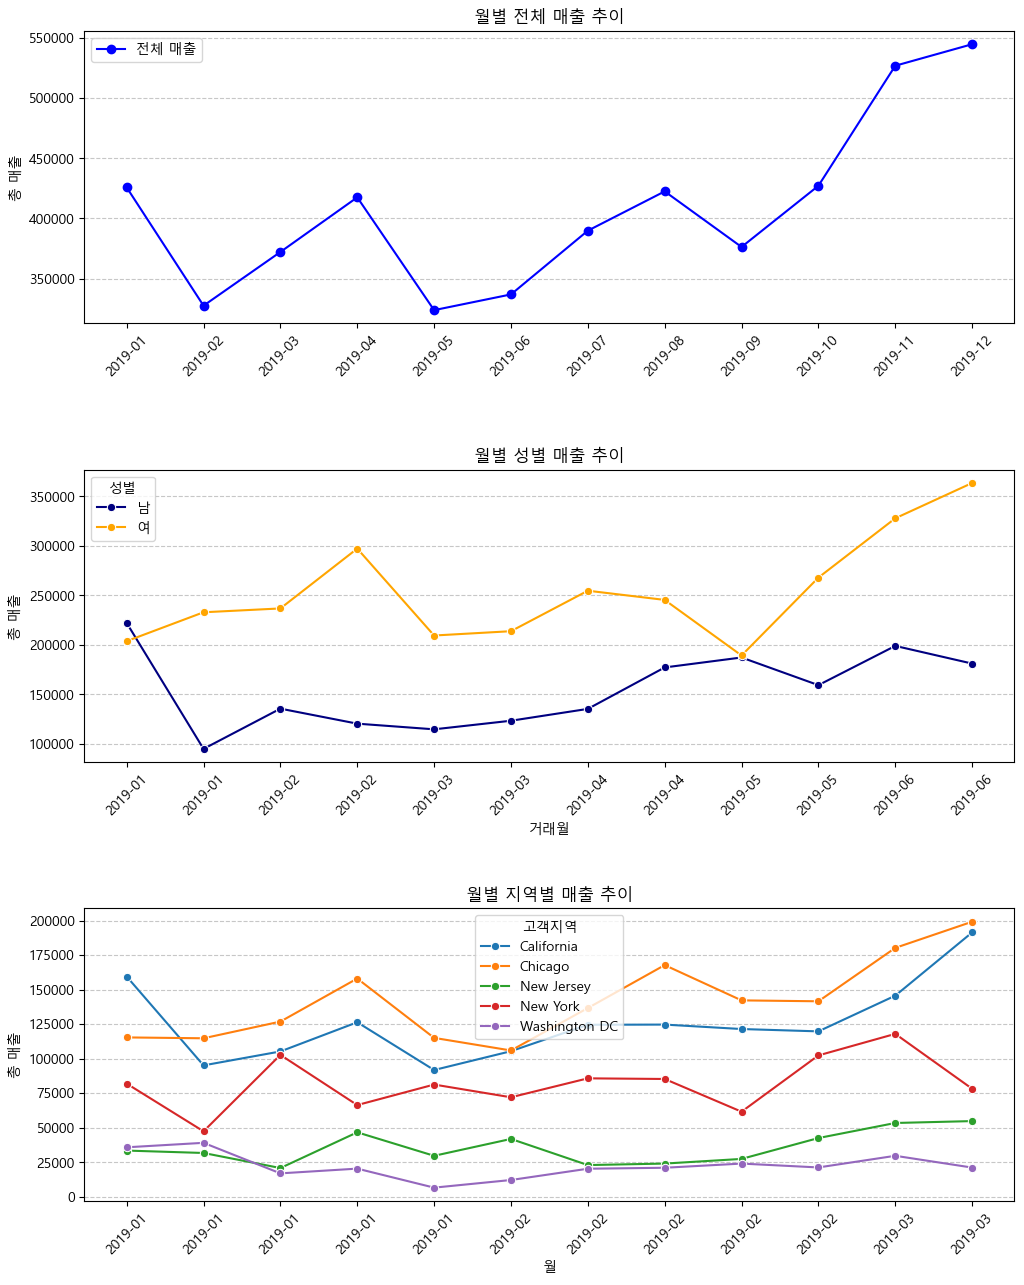

In [144]:
plt.rc('font', family='Malgun Gothic')
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Îß§Ï∂ú Í≥ÑÏÇ∞
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# Ï†ÑÏ≤¥ Îß§Ï∂ú Ï∂îÏù¥
monthly_sales = df.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()
monthly_sales['Í±∞ÎûòÏõî'] = monthly_sales['Í±∞ÎûòÏõî'].astype(str)

# ÏÑ±Î≥Ñ Îß§Ï∂ú Ï∂îÏù¥
gender_sales = df.groupby(['Í±∞ÎûòÏõî', 'ÏÑ±Î≥Ñ'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()
gender_sales['Í±∞ÎûòÏõî'] = gender_sales['Í±∞ÎûòÏõî'].astype(str)

# ÏßÄÏó≠Î≥Ñ Îß§Ï∂ú Ï∂îÏù¥
region_sales = df.groupby(['Í±∞ÎûòÏõî', 'Í≥†Í∞ùÏßÄÏó≠'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()
region_sales['Í±∞ÎûòÏõî'] = region_sales['Í±∞ÎûòÏõî'].astype(str)

# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=False)  # sharex=False Î°ú Î≥ÄÍ≤Ω

# Ï†ÑÏ≤¥ Îß§Ï∂ú Ï∂îÏù¥
axes[0].plot(monthly_sales['Í±∞ÎûòÏõî'], monthly_sales['Ï¥ù Îß§Ï∂ú'], marker='o', linestyle='-', color='b', label='Ï†ÑÏ≤¥ Îß§Ï∂ú')
axes[0].set_title("ÏõîÎ≥Ñ Ï†ÑÏ≤¥ Îß§Ï∂ú Ï∂îÏù¥")
axes[0].set_ylabel("Ï¥ù Îß§Ï∂ú")
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticklabels(monthly_sales['Í±∞ÎûòÏõî'], rotation=45)  # xÏ∂ï ÎààÍ∏à ÌöåÏ†Ñ

# ÏÑ±Î≥Ñ Îß§Ï∂ú Ï∂îÏù¥
sns.lineplot(data=gender_sales, x='Í±∞ÎûòÏõî', y='Ï¥ù Îß§Ï∂ú', hue='ÏÑ±Î≥Ñ', marker='o', ax=axes[1], palette={'ÎÇ®':'navy', 'Ïó¨':'orange'})
axes[1].set_title("ÏõîÎ≥Ñ ÏÑ±Î≥Ñ Îß§Ï∂ú Ï∂îÏù¥")
axes[1].set_ylabel("Ï¥ù Îß§Ï∂ú")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xticklabels(gender_sales['Í±∞ÎûòÏõî'], rotation=45)  # xÏ∂ï ÎààÍ∏à ÌöåÏ†Ñ

# ÏßÄÏó≠Î≥Ñ Îß§Ï∂ú Ï∂îÏù¥
sns.lineplot(data=region_sales, x='Í±∞ÎûòÏõî', y='Ï¥ù Îß§Ï∂ú', hue='Í≥†Í∞ùÏßÄÏó≠', marker='o', ax=axes[2])
axes[2].set_title("ÏõîÎ≥Ñ ÏßÄÏó≠Î≥Ñ Îß§Ï∂ú Ï∂îÏù¥")
axes[2].set_xlabel("Ïõî")
axes[2].set_ylabel("Ï¥ù Îß§Ï∂ú")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].set_xticklabels(region_sales['Í±∞ÎûòÏõî'], rotation=45)  # xÏ∂ï ÎààÍ∏à ÌöåÏ†Ñ

# ÏÑúÎ∏åÌîåÎ°Ø Í∞ÑÍ≤© Ï°∞Ï†ï
plt.subplots_adjust(hspace=0.5, bottom=0.1)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()



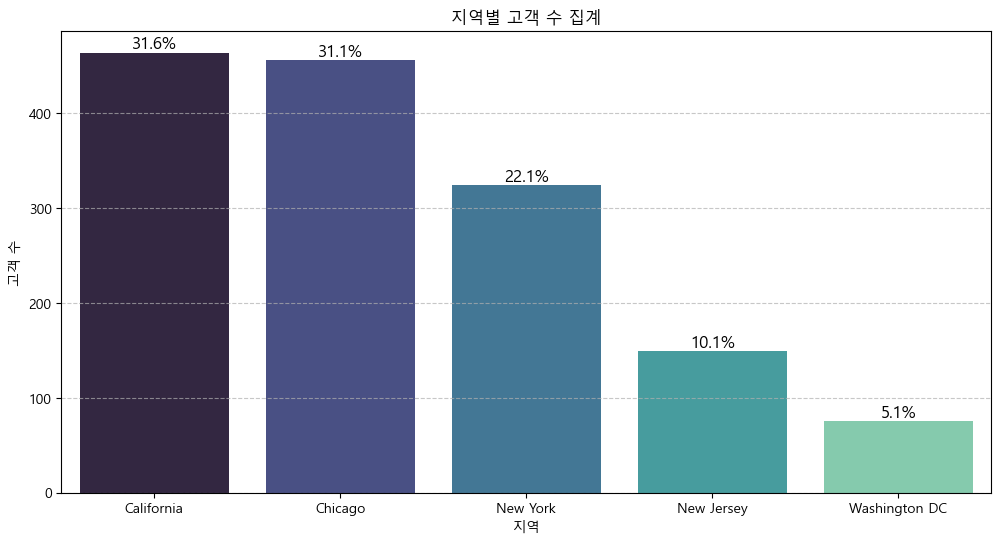

In [145]:

# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏßÄÏó≠Î≥Ñ Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
region_customer_count = df.groupby('Í≥†Í∞ùÏßÄÏó≠')['Í≥†Í∞ùID'].nunique().reset_index()
region_customer_count.rename(columns={'Í≥†Í∞ùID': 'Í≥†Í∞ù Ïàò'}, inplace=True)

# Ï†ÑÏ≤¥ Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
total_customers = region_customer_count['Í≥†Í∞ù Ïàò'].sum()

# ÏßÄÏó≠Î≥Ñ Í≥†Í∞ù ÎπÑÏú® Í≥ÑÏÇ∞
region_customer_count['Í≥†Í∞ù ÎπÑÏú®(%)'] = (region_customer_count['Í≥†Í∞ù Ïàò'] / total_customers) * 100

# ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
region_customer_count = region_customer_count.sort_values(by='Í≥†Í∞ù Ïàò', ascending=False)

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(12, 6))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ (Ïò§Î†åÏßÄ Í≥ÑÏó¥ Ï†ÅÏö©, ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨)
bars = sns.barplot(data=region_customer_count, x='Í≥†Í∞ùÏßÄÏó≠', y='Í≥†Í∞ù Ïàò', palette='mako', ax=ax)

# Í∞Å ÎßâÎåÄ ÏúÑÏóê Í≥†Í∞ù ÎπÑÏú® ÌëúÏãú
for bar, percentage in zip(bars.patches, region_customer_count['Í≥†Í∞ù ÎπÑÏú®(%)']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, color='black')

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
ax.set_ylabel("Í≥†Í∞ù Ïàò")
ax.set_xlabel("ÏßÄÏó≠")
ax.set_title("ÏßÄÏó≠Î≥Ñ Í≥†Í∞ù Ïàò ÏßëÍ≥Ñ")
ax.set_xticklabels(region_customer_count['Í≥†Í∞ùÏßÄÏó≠'], rotation=0, ha='center')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



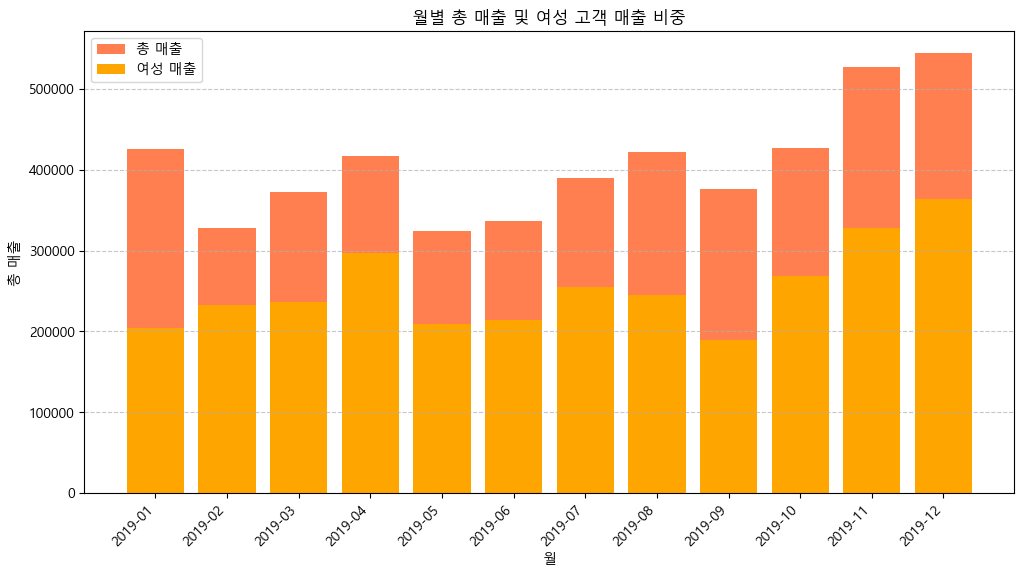

In [146]:
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Í≥ÑÏÇ∞
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# Ï†ÑÏ≤¥ Îß§Ï∂ú ÏßëÍ≥Ñ
monthly_sales = df.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÏßëÍ≥Ñ
female_sales = df[df['ÏÑ±Î≥Ñ'] == 'Ïó¨'].groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
monthly_sales = monthly_sales.merge(female_sales, on='Í±∞ÎûòÏõî', how='left', suffixes=('', '_Ïó¨ÏÑ±'))
monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'].fillna(0, inplace=True)

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÎπÑÏú® Í≥ÑÏÇ∞
monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®'] = monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'] / monthly_sales['Ï¥ù Îß§Ï∂ú']

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(12, 6))

# Ï¥ù Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars = ax.bar(monthly_sales['Í±∞ÎûòÏõî'].astype(str), monthly_sales['Ï¥ù Îß§Ï∂ú'], color='coral', label="Ï¥ù Îß§Ï∂ú")

# Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú® ÎßâÎåÄ Í∑∏ÎûòÌîÑ (Ï¥ù Îß§Ï∂ú ÎåÄÎπÑ ÎπÑÏú®)
ax.bar(monthly_sales['Í±∞ÎûòÏõî'].astype(str), monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'], color='orange', label="Ïó¨ÏÑ± Îß§Ï∂ú")

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
ax.set_ylabel("Ï¥ù Îß§Ï∂ú")
ax.set_xlabel("Ïõî")
ax.set_title("ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Î∞è Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÎπÑÏ§ë")
ax.set_xticklabels(monthly_sales['Í±∞ÎûòÏõî'].astype(str), rotation=45, ha='right')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax.legend()

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


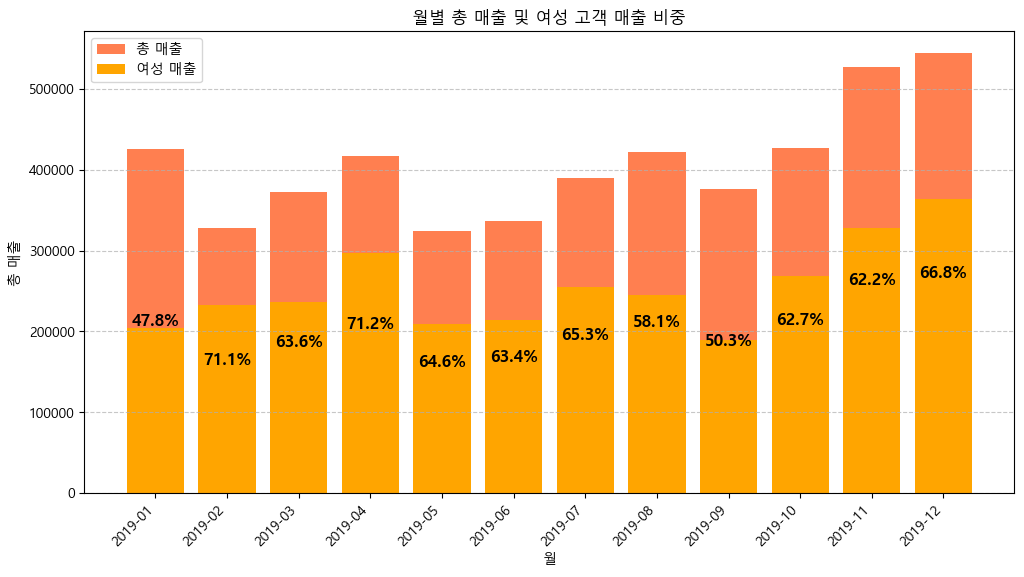

In [147]:
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Í≥ÑÏÇ∞
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# Ï†ÑÏ≤¥ Îß§Ï∂ú ÏßëÍ≥Ñ
monthly_sales = df.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÏßëÍ≥Ñ
female_sales = df[df['ÏÑ±Î≥Ñ'] == 'Ïó¨'].groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
monthly_sales = monthly_sales.merge(female_sales, on='Í±∞ÎûòÏõî', how='left', suffixes=('', '_Ïó¨ÏÑ±'))
monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'].fillna(0, inplace=True)

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÎπÑÏú® Í≥ÑÏÇ∞
monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'] = (monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'] / monthly_sales['Ï¥ù Îß§Ï∂ú']) * 100

# ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(12, 6))

# Ï¥ù Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars = ax.bar(monthly_sales['Í±∞ÎûòÏõî'].astype(str), monthly_sales['Ï¥ù Îß§Ï∂ú'], color='coral', label="Ï¥ù Îß§Ï∂ú")

# Ïó¨ÏÑ± Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ (Ï¥ù Îß§Ï∂ú ÎåÄÎπÑ ÎπÑÏú®)
ax.bar(monthly_sales['Í±∞ÎûòÏõî'].astype(str), monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'], color='orange', label="Ïó¨ÏÑ± Îß§Ï∂ú")

# Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú® ÏàòÏπò ÌëúÏãú
for bar, percentage in zip(bars, monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height * 0.5, f'{percentage:.1f}%', 
            ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
ax.set_ylabel("Ï¥ù Îß§Ï∂ú")
ax.set_xlabel("Ïõî")
ax.set_title("ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Î∞è Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÎπÑÏ§ë")
ax.set_xticklabels(monthly_sales['Í±∞ÎûòÏõî'].astype(str), rotation=45, ha='right')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax.legend()

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

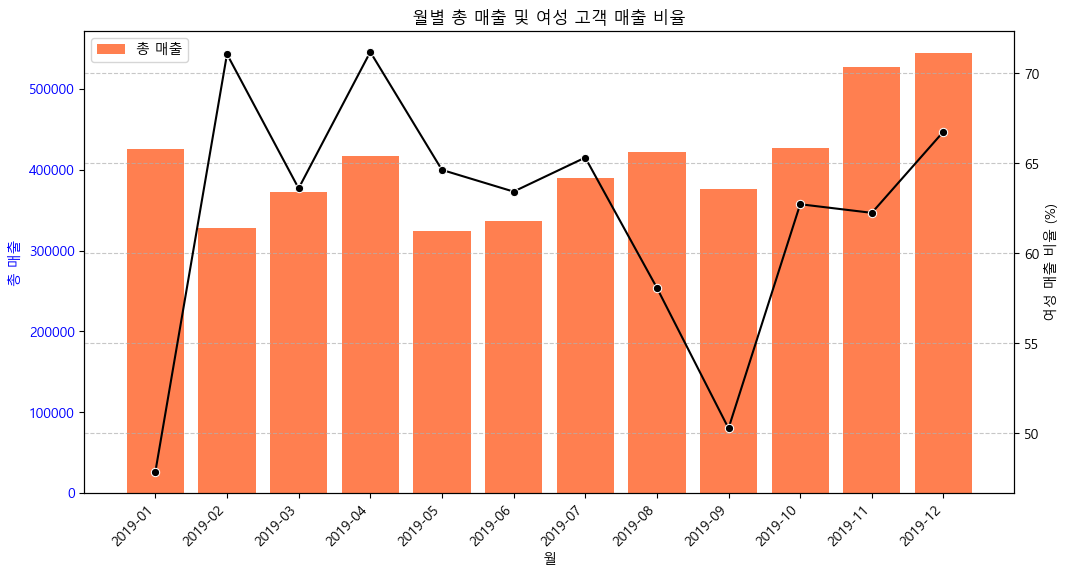

In [148]:
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Í≥ÑÏÇ∞
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# Ï†ÑÏ≤¥ Îß§Ï∂ú ÏßëÍ≥Ñ
monthly_sales = df.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÏßëÍ≥Ñ
female_sales = df[df['ÏÑ±Î≥Ñ'] == 'Ïó¨'].groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
monthly_sales = monthly_sales.merge(female_sales, on='Í±∞ÎûòÏõî', how='left', suffixes=('', '_Ïó¨ÏÑ±'))
monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'].fillna(0, inplace=True)

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÎπÑÏú® Í≥ÑÏÇ∞
monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'] = (monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'] / monthly_sales['Ï¥ù Îß§Ï∂ú']) * 100

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò (Ïò§Î•ò Ìï¥Í≤∞)
monthly_sales['Í±∞ÎûòÏõî'] = monthly_sales['Í±∞ÎûòÏõî'].astype(str)  # Period ‚Üí Î¨∏ÏûêÏó¥ Î≥ÄÌôò
monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'] = monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'].astype(float)  # Ïà´ÏûêÎ°ú Î≥ÄÌôò

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï¥ù Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars = ax1.bar(monthly_sales['Í±∞ÎûòÏõî'].astype(str), monthly_sales['Ï¥ù Îß§Ï∂ú'], color='coral', label="Ï¥ù Îß§Ï∂ú")
ax1.set_ylabel("Ï¥ù Îß§Ï∂ú", color='b')
ax1.set_xlabel("Ïõî")
ax1.set_title("ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Î∞è Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÎπÑÏú®")
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(monthly_sales['Í±∞ÎûòÏõî'].astype(str), rotation=45, ha='right')

# Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú® Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ Ï∂îÍ∞Ä
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Í±∞ÎûòÏõî', y='Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)', color='black', marker='o', ax=ax2)
ax2.set_ylabel("Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú® (%)", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

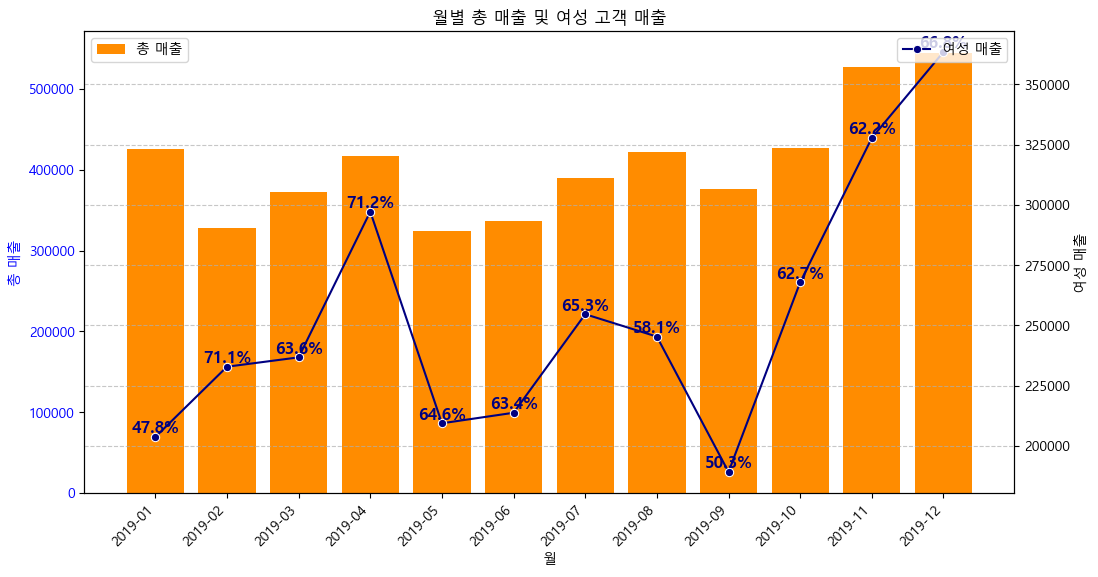

In [149]:

# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Í≥ÑÏÇ∞
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# Ï†ÑÏ≤¥ Îß§Ï∂ú ÏßëÍ≥Ñ
monthly_sales = df.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÏßëÍ≥Ñ
female_sales = df[df['ÏÑ±Î≥Ñ'] == 'Ïó¨'].groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
monthly_sales = monthly_sales.merge(female_sales, on='Í±∞ÎûòÏõî', how='left', suffixes=('', '_Ïó¨ÏÑ±'))
monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'].fillna(0, inplace=True)

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÎπÑÏú® Í≥ÑÏÇ∞
monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'] = (monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'] / monthly_sales['Ï¥ù Îß§Ï∂ú']) * 100

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò (Ïò§Î•ò Î∞©ÏßÄ)
monthly_sales['Í±∞ÎûòÏõî'] = monthly_sales['Í±∞ÎûòÏõî'].astype(str)  # Period ‚Üí Î¨∏ÏûêÏó¥ Î≥ÄÌôò
monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'] = monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'].astype(float)  # Ïà´ÏûêÎ°ú Î≥ÄÌôò

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï¥ù Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars = ax1.bar(monthly_sales['Í±∞ÎûòÏõî'], monthly_sales['Ï¥ù Îß§Ï∂ú'], color='darkorange', label="Ï¥ù Îß§Ï∂ú")
ax1.set_ylabel("Ï¥ù Îß§Ï∂ú", color='b')
ax1.set_xlabel("Ïõî")
ax1.set_title("ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Î∞è Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú")
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(monthly_sales['Í±∞ÎûòÏõî'], rotation=45, ha='right')

# Ïó¨ÏÑ± Îß§Ï∂ú Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ (Ï¥ù Îß§Ï∂úÍ≥º ÎèôÏùºÌïú Ï∂ï ÏÇ¨Ïö©)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Í±∞ÎûòÏõî', y='Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±', color='navy', marker='o', ax=ax2, label="Ïó¨ÏÑ± Îß§Ï∂ú")
ax2.set_ylabel("Ïó¨ÏÑ± Îß§Ï∂ú", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®ÏùÑ ÏÑ† Í∑∏ÎûòÌîÑ ÏúÑÏóê ÌëúÏãú
for i, txt in enumerate(monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)']):
    ax2.text(i, monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'].iloc[i], f'{txt:.1f}%', 
             ha='center', va='bottom', fontsize=12, color='navy', fontweight='bold')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


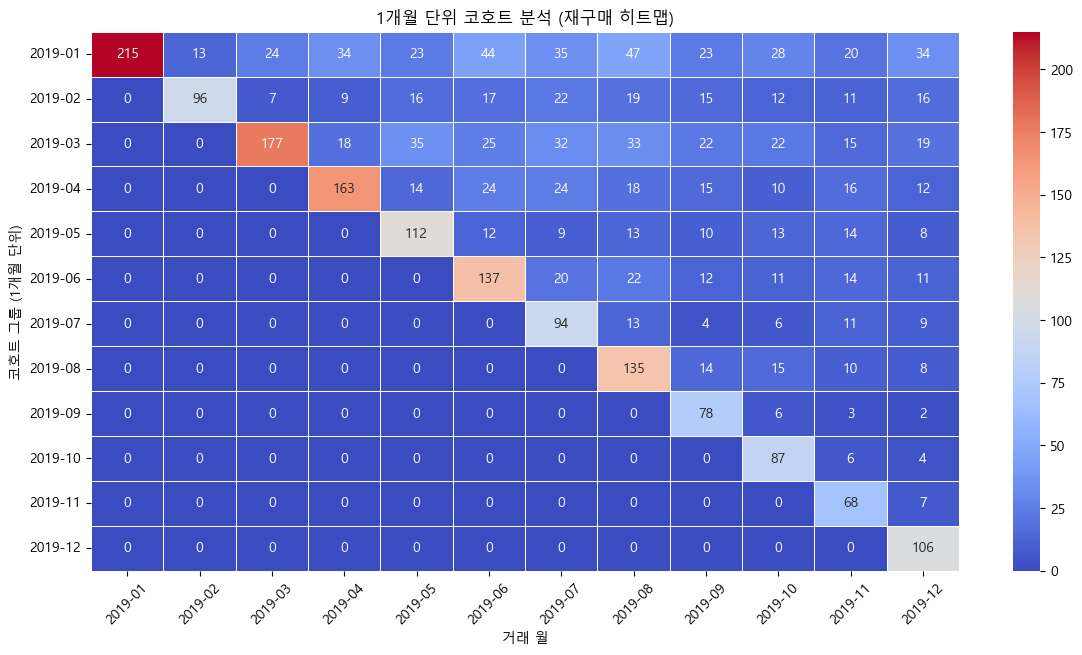

In [203]:

# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï≤´ Íµ¨Îß§ ÎÇ†Ïßú Í≥ÑÏÇ∞
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'}, inplace=True)

# Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df = df.merge(first_purchase, on='Í≥†Í∞ùID', how='left')

# 1Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Í∑∏Î£π ÏÉùÏÑ± (ÏµúÏ¥à Íµ¨Îß§ Í∏∞Ï§Ä)
df['ÏΩîÌò∏Ìä∏ Í∑∏Î£π'] = df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.to_period('M').astype(str)

# Í±∞Îûò Ïõî Í≥ÑÏÇ∞ (Ïû¨Íµ¨Îß§Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê)
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# ÏΩîÌò∏Ìä∏Î≥Ñ Í≥†Í∞ù Ïàò ÏßëÍ≥Ñ
cohort_data = df.groupby(['ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Í±∞ÎûòÏõî'])['Í≥†Í∞ùID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', columns='Í±∞ÎûòÏõî', values='Í≥†Í∞ùID').fillna(0)

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 7))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("1Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù (Ïû¨Íµ¨Îß§ ÌûàÌä∏Îßµ)")
plt.xlabel("Í±∞Îûò Ïõî")
plt.ylabel("ÏΩîÌò∏Ìä∏ Í∑∏Î£π (1Í∞úÏõî Îã®ÏúÑ)")
plt.xticks(rotation=45)
plt.show()



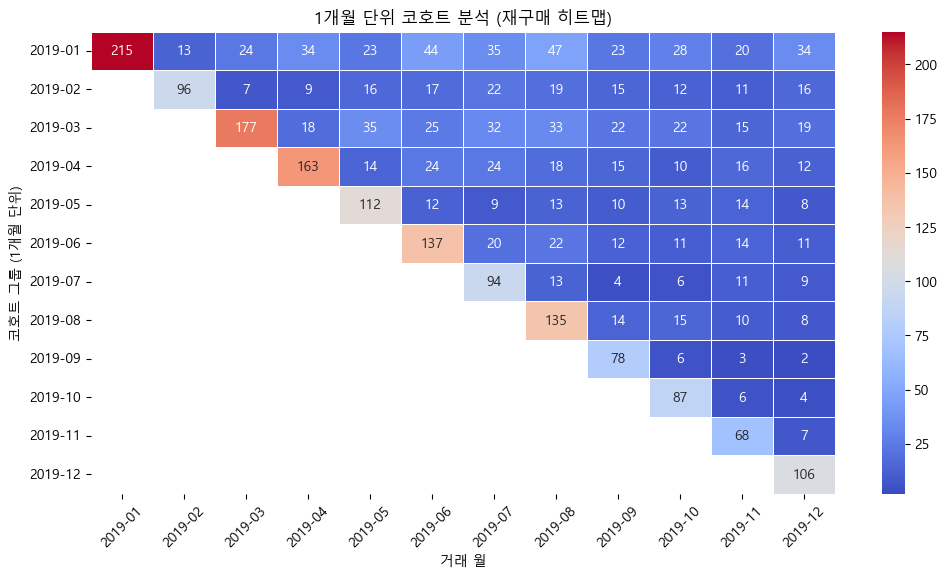

In [206]:

# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï≤´ Íµ¨Îß§ ÎÇ†Ïßú Í≥ÑÏÇ∞
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'}, inplace=True)

# Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (suffixes ÏÇ¨Ïö©)
df = df.merge(first_purchase, on='Í≥†Í∞ùID', how='left', suffixes=('', '_new'))

# Ï§ëÎ≥µÎêú 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú' Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú_new'], inplace=True)

# 1Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Í∑∏Î£π ÏÉùÏÑ± (ÏµúÏ¥à Íµ¨Îß§ Í∏∞Ï§Ä)
df['ÏΩîÌò∏Ìä∏ Í∑∏Î£π'] = df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.to_period('M')

# Í±∞Îûò Ïõî Í≥ÑÏÇ∞ (Ïû¨Íµ¨Îß§Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê)
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# ÏΩîÌò∏Ìä∏Î≥Ñ Í≥†Í∞ù Ïàò ÏßëÍ≥Ñ
cohort_data = df.groupby(['ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Í±∞ÎûòÏõî'])['Í≥†Í∞ùID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', columns='Í±∞ÎûòÏõî', values='Í≥†Í∞ùID')

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("1Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù (Ïû¨Íµ¨Îß§ ÌûàÌä∏Îßµ)")
plt.xlabel("Í±∞Îûò Ïõî")
plt.ylabel("ÏΩîÌò∏Ìä∏ Í∑∏Î£π (1Í∞úÏõî Îã®ÏúÑ)")
plt.xticks(rotation=45)
plt.show()



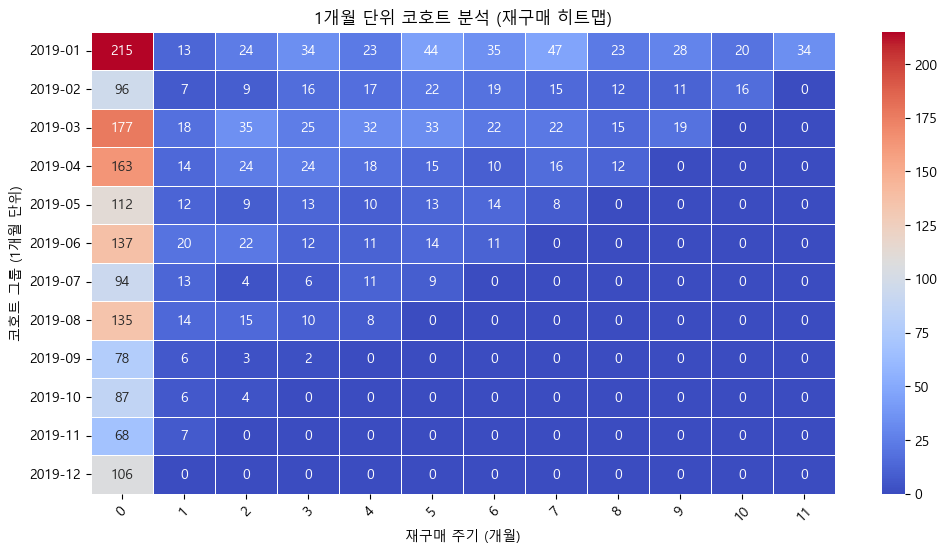

In [207]:
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï≤´ Íµ¨Îß§ ÎÇ†Ïßú Í≥ÑÏÇ∞
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'}, inplace=True)

# Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (suffixes ÏÇ¨Ïö©)
df = df.merge(first_purchase, on='Í≥†Í∞ùID', how='left', suffixes=('', '_new'))

# Ï§ëÎ≥µÎêú 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú' Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú_new'], inplace=True)

# ÏΩîÌò∏Ìä∏ Í∑∏Î£π ÏÉùÏÑ± (ÏµúÏ¥à Íµ¨Îß§ Í∏∞Ï§Ä, Ïõî Îã®ÏúÑ)
df['ÏΩîÌò∏Ìä∏ Í∑∏Î£π'] = df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.to_period('M')

# Ïû¨Íµ¨Îß§ Ïõî Ïàò Í≥ÑÏÇ∞
df['Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞'] = (df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M') - df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.to_period('M')).apply(lambda x: x.n)

# ÏΩîÌò∏Ìä∏Î≥Ñ Í≥†Í∞ù Ïàò ÏßëÍ≥Ñ
cohort_data = df.groupby(['ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞'])['Í≥†Í∞ùID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', columns='Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞', values='Í≥†Í∞ùID').fillna(0)

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("1Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù (Ïû¨Íµ¨Îß§ ÌûàÌä∏Îßµ)")
plt.xlabel("Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ (Í∞úÏõî)")
plt.ylabel("ÏΩîÌò∏Ìä∏ Í∑∏Î£π (1Í∞úÏõî Îã®ÏúÑ)")
plt.xticks(rotation=45)
plt.show()

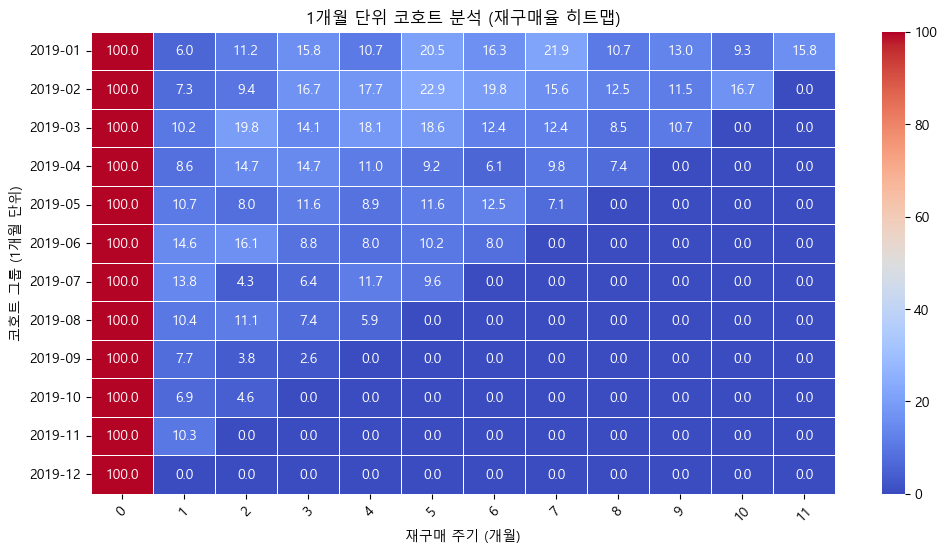

In [208]:
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï≤´ Íµ¨Îß§ ÎÇ†Ïßú Í≥ÑÏÇ∞
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'}, inplace=True)

# Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df = df.merge(first_purchase, on='Í≥†Í∞ùID', how='left', suffixes=('', '_new'))
df.drop(columns=['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú_new'], inplace=True)  # Ï§ëÎ≥µ Ïª¨Îüº Ï†úÍ±∞

# ÏΩîÌò∏Ìä∏ Í∑∏Î£π ÏÉùÏÑ± (ÏµúÏ¥à Íµ¨Îß§ Í∏∞Ï§Ä, Ïõî Îã®ÏúÑ)
df['ÏΩîÌò∏Ìä∏ Í∑∏Î£π'] = df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.to_period('M')

# Ïû¨Íµ¨Îß§ Ïõî Ïàò Í≥ÑÏÇ∞
df['Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞'] = (df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M') - df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.to_period('M')).apply(lambda x: x.n)

# ÏΩîÌò∏Ìä∏Î≥Ñ Í≥†Í∞ù Ïàò ÏßëÍ≥Ñ
cohort_data = df.groupby(['ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞'])['Í≥†Í∞ùID'].nunique().reset_index()

# ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
first_purchase_counts = cohort_data[cohort_data['Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞'] == 0][['ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Í≥†Í∞ùID']]
first_purchase_counts.rename(columns={'Í≥†Í∞ùID': 'ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò'}, inplace=True)

# Ïû¨Íµ¨Îß§Ïú® Í≥ÑÏÇ∞
cohort_data = cohort_data.merge(first_purchase_counts, on='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', how='left')
cohort_data['Ïû¨Íµ¨Îß§Ïú®'] = (cohort_data['Í≥†Í∞ùID'] / cohort_data['ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò']) * 100  # Î∞±Î∂ÑÏú® Î≥ÄÌôò

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ± (Ïû¨Íµ¨Îß§Ïú® Í∏∞Ï§Ä)
cohort_pivot = cohort_data.pivot(index='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', columns='Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞', values='Ïû¨Íµ¨Îß§Ïú®').fillna(0)

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("1Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù (Ïû¨Íµ¨Îß§Ïú® ÌûàÌä∏Îßµ)")
plt.xlabel("Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ (Í∞úÏõî)")
plt.ylabel("ÏΩîÌò∏Ìä∏ Í∑∏Î£π (1Í∞úÏõî Îã®ÏúÑ)")
plt.xticks(rotation=45)
plt.show()

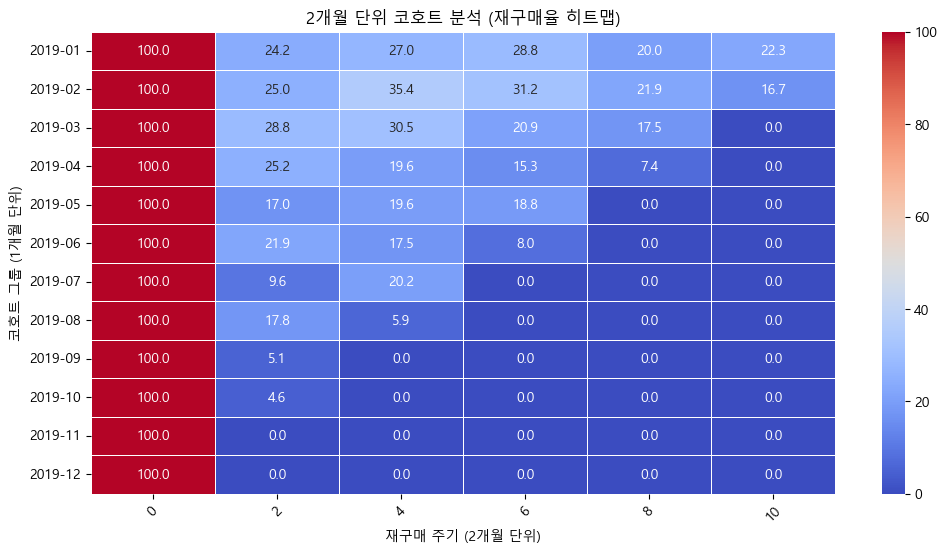

In [209]:

# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï≤´ Íµ¨Îß§ ÎÇ†Ïßú Í≥ÑÏÇ∞
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'}, inplace=True)

# Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df = df.merge(first_purchase, on='Í≥†Í∞ùID', how='left', suffixes=('', '_new'))
df.drop(columns=['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú_new'], inplace=True)  # Ï§ëÎ≥µ Ïª¨Îüº Ï†úÍ±∞

# ÏΩîÌò∏Ìä∏ Í∑∏Î£π ÏÉùÏÑ± (ÏµúÏ¥à Íµ¨Îß§ Í∏∞Ï§Ä, Ïõî Îã®ÏúÑ)
df['ÏΩîÌò∏Ìä∏ Í∑∏Î£π'] = df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.to_period('M')

# **Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ Í≥ÑÏÇ∞ (2Í∞úÏõî Îã®ÏúÑ)**
df['Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞'] = ((df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M') - df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.to_period('M')).apply(lambda x: x.n) // 2) * 2

# ÏΩîÌò∏Ìä∏Î≥Ñ Í≥†Í∞ù Ïàò ÏßëÍ≥Ñ
cohort_data = df.groupby(['ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞'])['Í≥†Í∞ùID'].nunique().reset_index()

# ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
first_purchase_counts = cohort_data[cohort_data['Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞'] == 0][['ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Í≥†Í∞ùID']]
first_purchase_counts.rename(columns={'Í≥†Í∞ùID': 'ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò'}, inplace=True)

# Ïû¨Íµ¨Îß§Ïú® Í≥ÑÏÇ∞
cohort_data = cohort_data.merge(first_purchase_counts, on='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', how='left')
cohort_data['Ïû¨Íµ¨Îß§Ïú®'] = (cohort_data['Í≥†Í∞ùID'] / cohort_data['ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò']) * 100  # Î∞±Î∂ÑÏú® Î≥ÄÌôò

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ± (Ïû¨Íµ¨Îß§Ïú® Í∏∞Ï§Ä)
cohort_pivot = cohort_data.pivot(index='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', columns='Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞', values='Ïû¨Íµ¨Îß§Ïú®').fillna(0)

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("2Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù (Ïû¨Íµ¨Îß§Ïú® ÌûàÌä∏Îßµ)")
plt.xlabel("Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ (2Í∞úÏõî Îã®ÏúÑ)")
plt.ylabel("ÏΩîÌò∏Ìä∏ Í∑∏Î£π (1Í∞úÏõî Îã®ÏúÑ)")
plt.xticks(rotation=45)
plt.show()


In [151]:


# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï≤´ Íµ¨Îß§ ÎÇ†Ïßú Í≥ÑÏÇ∞
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'}, inplace=True)

# Î≥ëÌï© ÌõÑ Ïª¨Îüº ÌôïÏù∏
df = df.merge(first_purchase, on='Í≥†Í∞ùID', how='left')
print(df.columns)  # 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú' Ï°¥Ïû¨ ÌôïÏù∏

# 2Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Í∑∏Î£π ÏÉùÏÑ± (Ï≤´ Íµ¨Îß§ Í∏∞Ï§Ä)
df['ÏΩîÌò∏Ìä∏ Í∑∏Î£π'] = ((df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.year * 12 + df['Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'].dt.month) // 2)

# Í±∞ÎûòÍ∞Ä Î∞úÏÉùÌïú Ïõî Í≥ÑÏÇ∞ (Ïû¨Íµ¨Îß§Í∞Ä Î∞úÏÉùÌïú ÏãúÏ†ê, 2Í∞úÏõî Îã®ÏúÑÎ°ú Î≥ÄÌôò)
df['Í±∞ÎûòÏõî'] = ((df['Í±∞ÎûòÎÇ†Ïßú'].dt.year * 12 + df['Í±∞ÎûòÎÇ†Ïßú'].dt.month) // 2)

# ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
cohort_initial = df.groupby('ÏΩîÌò∏Ìä∏ Í∑∏Î£π')['Í≥†Í∞ùID'].nunique().reset_index()
cohort_initial.rename(columns={'Í≥†Í∞ùID': 'ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò'}, inplace=True)

# ÏΩîÌò∏Ìä∏Î≥Ñ Í∞Å Ïõî(2Í∞úÏõî Îã®ÏúÑ)Î≥Ñ ÎÇ®ÏïÑ ÏûàÎäî Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
cohort_data = df.groupby(['ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Í±∞ÎûòÏõî'])['Í≥†Í∞ùID'].nunique().reset_index()

# ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù ÏàòÏôÄ Î≥ëÌï©ÌïòÏó¨ Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞
cohort_data = cohort_data.merge(cohort_initial, on='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', how='left')
cohort_data['Î¶¨ÌÖêÏÖòÏú®(%)'] = (cohort_data['Í≥†Í∞ùID'] / cohort_data['ÏµúÏ¥à Íµ¨Îß§ Í≥†Í∞ù Ïàò']) * 100

# ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôòÌïòÏó¨ ÌûàÌä∏Îßµ ÌòïÌÉúÎ°ú Í∞ÄÍ≥µ
cohort_pivot = cohort_data.pivot(index='ÏΩîÌò∏Ìä∏ Í∑∏Î£π', columns='Í±∞ÎûòÏõî', values='Î¶¨ÌÖêÏÖòÏú®(%)')

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("2Í∞úÏõî Îã®ÏúÑ ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù (Î¶¨ÌÖêÏÖò ÌûàÌä∏Îßµ)")
plt.xlabel("Í±∞Îûò Ïõî (2Í∞úÏõî Îã®ÏúÑ)")
plt.ylabel("ÏΩîÌò∏Ìä∏ Í∑∏Î£π (2Í∞úÏõî Îã®ÏúÑ)")
plt.xticks(rotation=45)
plt.show()



Index(['Í≥†Í∞ùID', 'Í±∞ÎûòID', 'Í±∞ÎûòÎÇ†Ïßú', 'Ï†úÌíàID', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨', 'ÏàòÎüâ', 'ÌèâÍ∑†Í∏àÏï°', 'Î∞∞ÏÜ°Î£å', 'Ïø†Ìè∞ÏÉÅÌÉú',
       'ÏÑ±Î≥Ñ', 'Í≥†Í∞ùÏßÄÏó≠', 'Í∞ÄÏûÖÍ∏∞Í∞Ñ', 'Ïø†Ìè∞ÏΩîÎìú', 'Ìï†Ïù∏Ïú®', 'Ìï†Ïù∏Í∏àÏï°', 'Îß§Ï∂ú', 'ÏàòÏùµ', 'Ï¥ù Îß§Ï∂ú', 'Í±∞ÎûòÏõî',
       'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú_x', 'ÏΩîÌò∏Ìä∏ Í∑∏Î£π', 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú_y'],
      dtype='object')


KeyError: 'Ï≤´ Íµ¨Îß§ÎÇ†Ïßú'

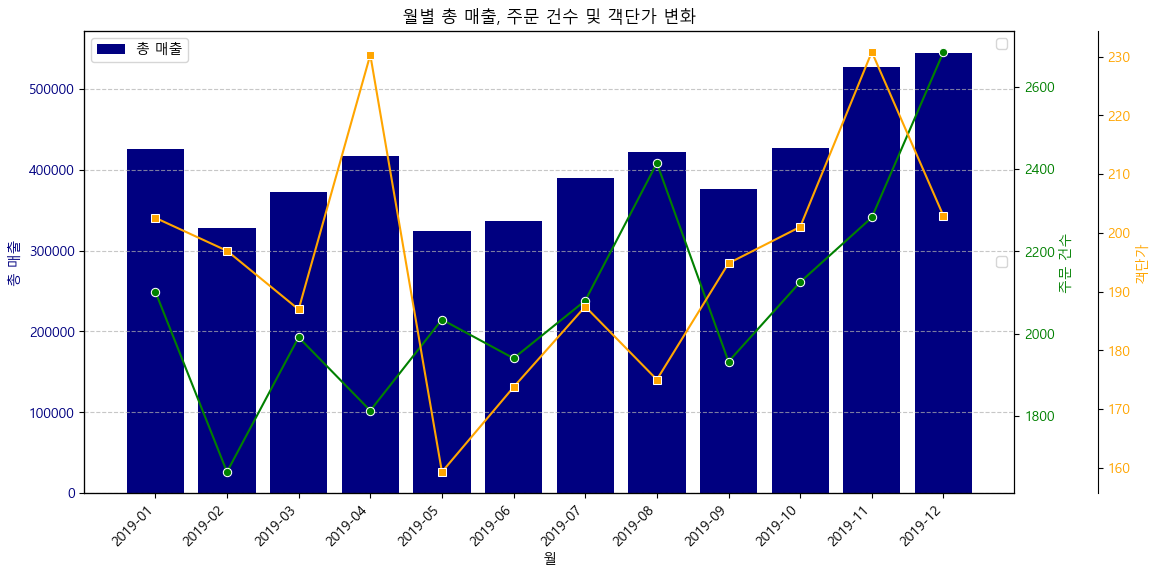

In [ ]:

# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú, Ï£ºÎ¨∏ Í±¥Ïàò, Í∞ùÎã®Í∞Ä Í≥ÑÏÇ∞
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M').astype(str)  # Period ‚Üí Î¨∏ÏûêÏó¥ Î≥ÄÌôò
monthly_sales = df.groupby('Í±∞ÎûòÏõî').agg({'Ï¥ù Îß§Ï∂ú': 'sum', 'Í±∞ÎûòID': 'nunique'}).reset_index()
monthly_sales.rename(columns={'Í±∞ÎûòID': 'Ï£ºÎ¨∏ Í±¥Ïàò'}, inplace=True)

# Í∞ùÎã®Í∞Ä(AOV) Í≥ÑÏÇ∞
monthly_sales['Í∞ùÎã®Í∞Ä'] = monthly_sales['Ï¥ù Îß§Ï∂ú'] / monthly_sales['Ï£ºÎ¨∏ Í±¥Ïàò']

# ÏãúÍ∞ÅÌôî ÏΩîÎìú
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï¥ù Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars = ax1.bar(monthly_sales['Í±∞ÎûòÏõî'], monthly_sales['Ï¥ù Îß§Ï∂ú'], color='navy', label="Ï¥ù Îß§Ï∂ú")
ax1.set_ylabel("Ï¥ù Îß§Ï∂ú", color='navy')
ax1.set_xlabel("Ïõî")
ax1.set_title("ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú, Ï£ºÎ¨∏ Í±¥Ïàò Î∞è Í∞ùÎã®Í∞Ä Î≥ÄÌôî")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_sales['Í±∞ÎûòÏõî'], rotation=45, ha='right')

# Ï£ºÎ¨∏ Í±¥Ïàò Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ (Ï¥àÎ°ùÏÉâ)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Í±∞ÎûòÏõî', y='Ï£ºÎ¨∏ Í±¥Ïàò', color='green', marker='o', ax=ax2)
ax2.set_ylabel("Ï£ºÎ¨∏ Í±¥Ïàò", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Í∞ùÎã®Í∞Ä Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ (Ï£ºÌô©ÏÉâ)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))  # ÏÑ∏ Î≤àÏß∏ Ï∂ï ÏúÑÏπò Ï°∞Ï†ï
sns.lineplot(data=monthly_sales, x='Í±∞ÎûòÏõî', y='Í∞ùÎã®Í∞Ä', color='orange', marker='s', ax=ax3)
ax3.set_ylabel("Í∞ùÎã®Í∞Ä", color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

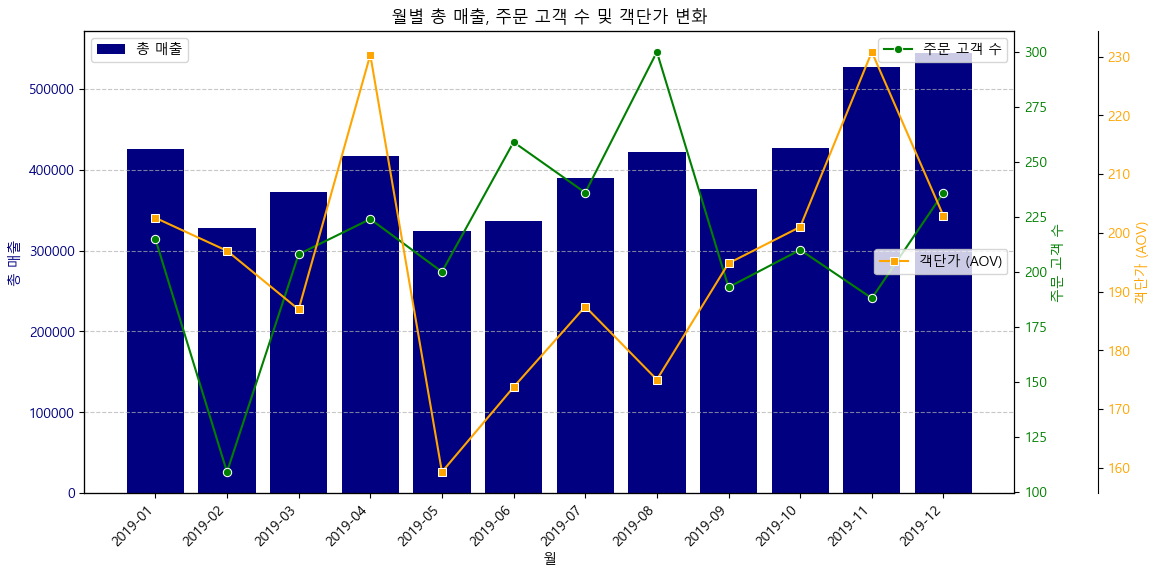

In [202]:
# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú, Ï£ºÎ¨∏ Í±¥Ïàò, Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M').astype(str)  # Period ‚Üí Î¨∏ÏûêÏó¥ Î≥ÄÌôò
monthly_sales = df.groupby('Í±∞ÎûòÏõî').agg({'Ï¥ù Îß§Ï∂ú': 'sum', 'Í±∞ÎûòID': 'nunique', 'Í≥†Í∞ùID': 'nunique'}).reset_index()
monthly_sales.rename(columns={'Í±∞ÎûòID': 'Ï£ºÎ¨∏ Í±¥Ïàò', 'Í≥†Í∞ùID': 'Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò'}, inplace=True)

# Í∞ùÎã®Í∞Ä(AOV) Í≥ÑÏÇ∞ (Ï£ºÎ¨∏ Í±¥Ïàò Í∏∞Ï§Ä)
monthly_sales['Í∞ùÎã®Í∞Ä'] = monthly_sales['Ï¥ù Îß§Ï∂ú'] / monthly_sales['Ï£ºÎ¨∏ Í±¥Ïàò']

# ÏãúÍ∞ÅÌôî ÏΩîÎìú
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï¥ù Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars = ax1.bar(monthly_sales['Í±∞ÎûòÏõî'], monthly_sales['Ï¥ù Îß§Ï∂ú'], color='navy', label="Ï¥ù Îß§Ï∂ú")
ax1.set_ylabel("Ï¥ù Îß§Ï∂ú", color='navy')
ax1.set_xlabel("Ïõî")
ax1.set_title("ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú, Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò Î∞è Í∞ùÎã®Í∞Ä Î≥ÄÌôî")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_sales['Í±∞ÎûòÏõî'], rotation=45, ha='right')

# Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ (Ï¥àÎ°ùÏÉâ)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Í±∞ÎûòÏõî', y='Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò', color='green', marker='o', ax=ax2, label="Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò")
ax2.set_ylabel("Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Í∞ùÎã®Í∞Ä Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ (Ï£ºÌô©ÏÉâ)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))  # ÏÑ∏ Î≤àÏß∏ Ï∂ï ÏúÑÏπò Ï°∞Ï†ï
sns.lineplot(data=monthly_sales, x='Í±∞ÎûòÏõî', y='Í∞ùÎã®Í∞Ä', color='orange', marker='s', ax=ax3, label="Í∞ùÎã®Í∞Ä (AOV)")
ax3.set_ylabel("Í∞ùÎã®Í∞Ä (AOV)", color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()


In [188]:

# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Ï£ºÎ¨∏ Í±¥Ïàò Í≥ÑÏÇ∞ (ÎèôÏùº Í≥†Í∞ù & ÎèôÏùº ÎÇ†ÏßúÏùò Ïó¨Îü¨ Í±∞Îûò IDÎäî 1Í±¥ÏúºÎ°ú Í∞ÑÏ£º)
df_unique_orders = df.groupby(['Í±∞ÎûòÎÇ†Ïßú', 'Í≥†Í∞ùID', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'])['Í±∞ÎûòID'].nunique().reset_index()

# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä (Í±∞ÎûòÏõîÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò)
df_unique_orders['Í±∞ÎûòÏõî'] = df_unique_orders['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M').astype(str)

# Îß§Ï∂ú ÏßëÍ≥Ñ (ÏõîÎ≥Ñ & Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ)
monthly_sales = df.groupby(['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()
monthly_sales['Í±∞ÎûòÏõî'] = monthly_sales['Í±∞ÎûòÏõî'].astype(str)  # Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò

# Îß§Ï∂ú ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÑ†Ï†ï (Í∞Å ÏõîÎ≥Ñ)
selected_months = ['2019-01', '2019-02', '2019-04', '2019-05', '2019-08', '2019-12']
top_categories = monthly_sales[monthly_sales['Í±∞ÎûòÏõî'].isin(selected_months)].groupby('Í±∞ÎûòÏõî').apply(lambda x: x.nlargest(5, 'Ï¥ù Îß§Ï∂ú')).reset_index(drop=True)

# Ï£ºÎ¨∏ Í±¥Ïàò Í≥ÑÏÇ∞ (ÏõîÎ≥Ñ & Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ)
order_counts = df_unique_orders.groupby(['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'])['Í±∞ÎûòID'].count().reset_index()
order_counts.rename(columns={'Í±∞ÎûòID': 'Ï£ºÎ¨∏ Í±¥Ïàò'}, inplace=True)
order_counts['Í±∞ÎûòÏõî'] = order_counts['Í±∞ÎûòÏõî'].astype(str)  # Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò

# Í∞ùÎã®Í∞Ä(AOV) Í≥ÑÏÇ∞ (ÏõîÎ≥Ñ & Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ)
category_revenue = df.groupby(['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()
category_revenue['Í±∞ÎûòÏõî'] = category_revenue['Í±∞ÎûòÏõî'].astype(str)  # Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò
category_revenue = category_revenue.merge(order_counts, on=['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'], how='left')

# Í∞ùÎã®Í∞Ä Í≥ÑÏÇ∞
category_revenue['Í∞ùÎã®Í∞Ä(AOV)'] = category_revenue['Ï¥ù Îß§Ï∂ú'] / category_revenue['Ï£ºÎ¨∏ Í±¥Ïàò']

# ÏµúÏ¢Ö ÌÖåÏù¥Î∏î ÏÉùÏÑ± (Îß§Ï∂ú TOP 5 Ïπ¥ÌÖåÍ≥†Î¶¨ Í∏∞Ï§Ä)
final_table = top_categories.merge(order_counts, on=['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'], how='left')
final_table = final_table.merge(category_revenue[['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨', 'Í∞ùÎã®Í∞Ä(AOV)']], on=['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'], how='left')

final_table

Í±∞ÎûòÏõî                Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨       Ï¥ù Îß§Ï∂ú  Ï£ºÎ¨∏ Í±¥Ïàò     Í∞ùÎã®Í∞Ä(AOV)
0   2019-01              Nest-USA  292823.76    219  1337.094795
1   2019-01               Apparel   42761.72    188   227.455957
2   2019-01                Office   30833.50    161   191.512422
3   2019-01             Drinkware   16578.85    122   135.892213
4   2019-01                  Bags   11927.90     78   152.921795
5   2019-02              Nest-USA  202115.52    120  1684.296000
6   2019-02               Apparel   42930.76    123   349.030569
7   2019-02                Office   22267.13     97   229.558041
8   2019-02                  Bags   19273.32     69   279.323478
9   2019-02             Drinkware   16114.31     92   175.155543
10  2019-04              Nest-USA  187365.26    183  1023.853880
11  2019-04               Apparel   93353.44    224   416.756429
12  2019-04                Office   38401.01    160   240.006313
13  2019-04             Drinkware   28087.23    115   244.236783
14  2019-04  Notebooks & Journals   23080.20     52   443.850000
15  2019-05              Nest-USA  178604.33    187   955.103369
16  2019-05               Apparel   65094.77    197   330.430305
17  2019-05                Office   24475.25    149   164.263423
18  2019-05             Drinkware   17476.22    116   150.657069
19  2019-05                  Bags   10701.73     83   128.936506
20  2019-08              Nest-USA  202140.43    250   808.561720
21  2019-08               Apparel   61344.64    319   192.302947
22  2019-08                Office   28157.55    199   141.495226
23  2019-08  Notebooks & Journals   28114.63    117   240.295983
24  2019-08             Drinkware   24329.89    190   128.052053
25  2019-12              Nest-USA  290228.36    237  1224.592236
26  2019-12                  Nest  149030.26    192   776.199271
27  2019-12               Apparel   52886.77    216   244.846157
28  2019-12                Office   19301.87    135   142.976815
29  2019-12             Drinkware   10561.70     67   157.637313

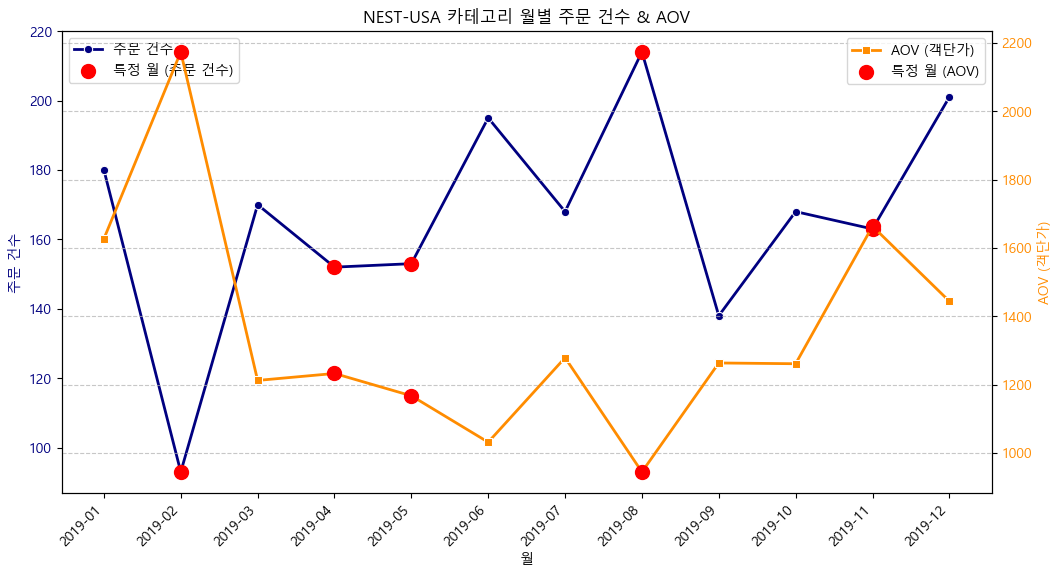

In [183]:
# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M').astype(str)

# NEST-USA Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÌïÑÌÑ∞ÎßÅ
df_nest = df[df['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'] == 'Nest-USA']

# ÏõîÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Í≥ÑÏÇ∞ (ÎèôÏùº Í≥†Í∞ù & ÎèôÏùº ÎÇ†ÏßúÏùò Ïó¨Îü¨ Í±∞Îûò IDÎäî 1Í±¥ÏúºÎ°ú Í∞ÑÏ£º)
df_nest_orders = df_nest.groupby(['Í±∞ÎûòÏõî', 'Í≥†Í∞ùID'])['Í±∞ÎûòID'].nunique().reset_index()
monthly_order_counts = df_nest_orders.groupby('Í±∞ÎûòÏõî')['Í±∞ÎûòID'].count().reset_index()
monthly_order_counts.rename(columns={'Í±∞ÎûòID': 'Ï£ºÎ¨∏ Í±¥Ïàò'}, inplace=True)

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú ÏßëÍ≥Ñ
monthly_revenue = df_nest.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# AOV (ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°) Í≥ÑÏÇ∞
monthly_aov = monthly_revenue.merge(monthly_order_counts, on='Í±∞ÎûòÏõî', how='left')
monthly_aov['AOV'] = monthly_aov['Ï¥ù Îß§Ï∂ú'] / monthly_aov['Ï£ºÎ¨∏ Í±¥Ïàò']

# ÌäπÏ†ï Ïõî ÌëúÏãú (2, 4, 5, 8, 12Ïõî)
highlight_months = ['2019-02', '2019-04', '2019-05', '2019-08', '2019-11']

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï£ºÎ¨∏ Í±¥Ïàò ÏÑ† Í∑∏ÎûòÌîÑ
sns.lineplot(data=monthly_aov, x='Í±∞ÎûòÏõî', y='Ï£ºÎ¨∏ Í±¥Ïàò', color='navy', marker='o', linewidth=2, ax=ax1, label="Ï£ºÎ¨∏ Í±¥Ïàò")
ax1.set_ylabel("Ï£ºÎ¨∏ Í±¥Ïàò", color='navy')
ax1.set_xlabel("Ïõî")
ax1.set_title("NEST-USA Ïπ¥ÌÖåÍ≥†Î¶¨ ÏõîÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò & AOV")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_aov['Í±∞ÎûòÏõî'], rotation=45, ha='right')

# AOV ÏÑ† Í∑∏ÎûòÌîÑ (Î≥¥Ï°∞Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_aov, x='Í±∞ÎûòÏõî', y='AOV', color='darkorange', marker='s', linewidth=2, ax=ax2, label="AOV (Í∞ùÎã®Í∞Ä)")
ax2.set_ylabel("AOV (Í∞ùÎã®Í∞Ä)", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# ÌäπÏ†ï Ïõî(2, 4, 5, 8, 11Ïõî)Ïóê Îπ®Í∞Ñ Ï†ê ÌëúÏãú
highlight_data = monthly_aov[monthly_aov['Í±∞ÎûòÏõî'].isin(highlight_months)]
ax1.scatter(highlight_data['Í±∞ÎûòÏõî'], highlight_data['Ï£ºÎ¨∏ Í±¥Ïàò'], color='red', s=100, zorder=3, label="ÌäπÏ†ï Ïõî (Ï£ºÎ¨∏ Í±¥Ïàò)")
ax2.scatter(highlight_data['Í±∞ÎûòÏõî'], highlight_data['AOV'], color='red', s=100, zorder=3, label="ÌäπÏ†ï Ïõî (AOV)")

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



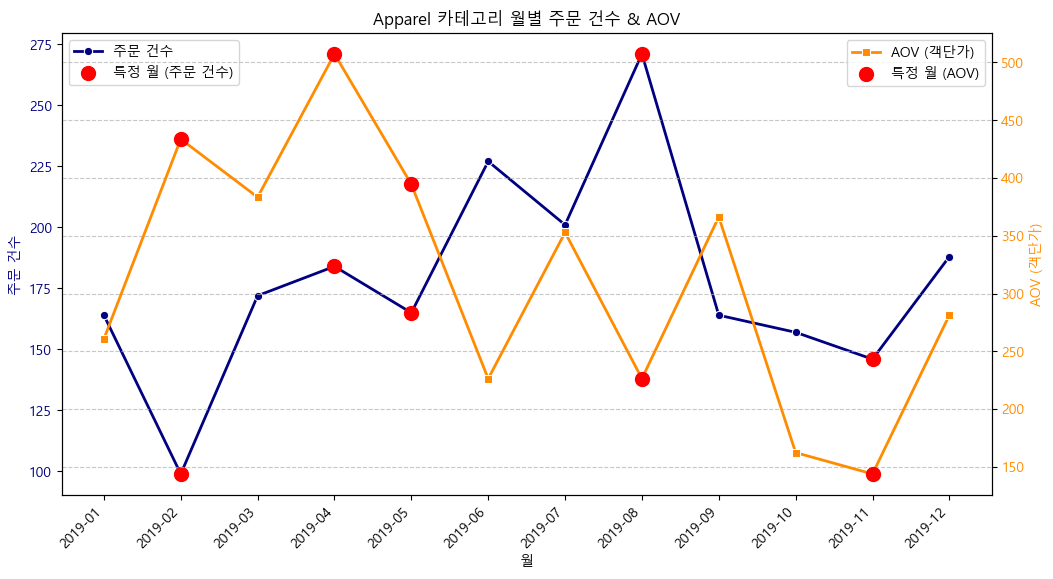

In [185]:

# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M').astype(str)

# Apparel Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÌïÑÌÑ∞ÎßÅ
df_apparel = df[df['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'] == 'Apparel']

# ÏõîÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Í≥ÑÏÇ∞ (ÎèôÏùº Í≥†Í∞ù & ÎèôÏùº ÎÇ†ÏßúÏùò Ïó¨Îü¨ Í±∞Îûò IDÎäî 1Í±¥ÏúºÎ°ú Í∞ÑÏ£º)
df_apparel_orders = df_apparel.groupby(['Í±∞ÎûòÏõî', 'Í≥†Í∞ùID'])['Í±∞ÎûòID'].nunique().reset_index()
monthly_order_counts = df_apparel_orders.groupby('Í±∞ÎûòÏõî')['Í±∞ÎûòID'].count().reset_index()
monthly_order_counts.rename(columns={'Í±∞ÎûòID': 'Ï£ºÎ¨∏ Í±¥Ïàò'}, inplace=True)

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú ÏßëÍ≥Ñ
monthly_revenue = df_apparel.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# AOV (ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°) Í≥ÑÏÇ∞
monthly_aov = monthly_revenue.merge(monthly_order_counts, on='Í±∞ÎûòÏõî', how='left')
monthly_aov['AOV'] = monthly_aov['Ï¥ù Îß§Ï∂ú'] / monthly_aov['Ï£ºÎ¨∏ Í±¥Ïàò']

# ÌäπÏ†ï Ïõî ÌëúÏãú (2, 4, 5, 8, 11Ïõî)
highlight_months = ['2019-02', '2019-04', '2019-05', '2019-08', '2019-11']

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï£ºÎ¨∏ Í±¥Ïàò ÏÑ† Í∑∏ÎûòÌîÑ
sns.lineplot(data=monthly_aov, x='Í±∞ÎûòÏõî', y='Ï£ºÎ¨∏ Í±¥Ïàò', color='navy', marker='o', linewidth=2, ax=ax1, label="Ï£ºÎ¨∏ Í±¥Ïàò")
ax1.set_ylabel("Ï£ºÎ¨∏ Í±¥Ïàò", color='navy')
ax1.set_xlabel("Ïõî")
ax1.set_title("Apparel Ïπ¥ÌÖåÍ≥†Î¶¨ ÏõîÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò & AOV")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_aov['Í±∞ÎûòÏõî'], rotation=45, ha='right')

# AOV ÏÑ† Í∑∏ÎûòÌîÑ (Î≥¥Ï°∞Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_aov, x='Í±∞ÎûòÏõî', y='AOV', color='darkorange', marker='s', linewidth=2, ax=ax2, label="AOV (Í∞ùÎã®Í∞Ä)")
ax2.set_ylabel("AOV (Í∞ùÎã®Í∞Ä)", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# ÌäπÏ†ï Ïõî(2, 4, 5, 8, 11Ïõî)Ïóê Îπ®Í∞Ñ Ï†ê ÌëúÏãú
highlight_data = monthly_aov[monthly_aov['Í±∞ÎûòÏõî'].isin(highlight_months)]
ax1.scatter(highlight_data['Í±∞ÎûòÏõî'], highlight_data['Ï£ºÎ¨∏ Í±¥Ïàò'], color='red', s=100, zorder=3, label="ÌäπÏ†ï Ïõî (Ï£ºÎ¨∏ Í±¥Ïàò)")
ax2.scatter(highlight_data['Í±∞ÎûòÏõî'], highlight_data['AOV'], color='red', s=100, zorder=3, label="ÌäπÏ†ï Ïõî (AOV)")

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


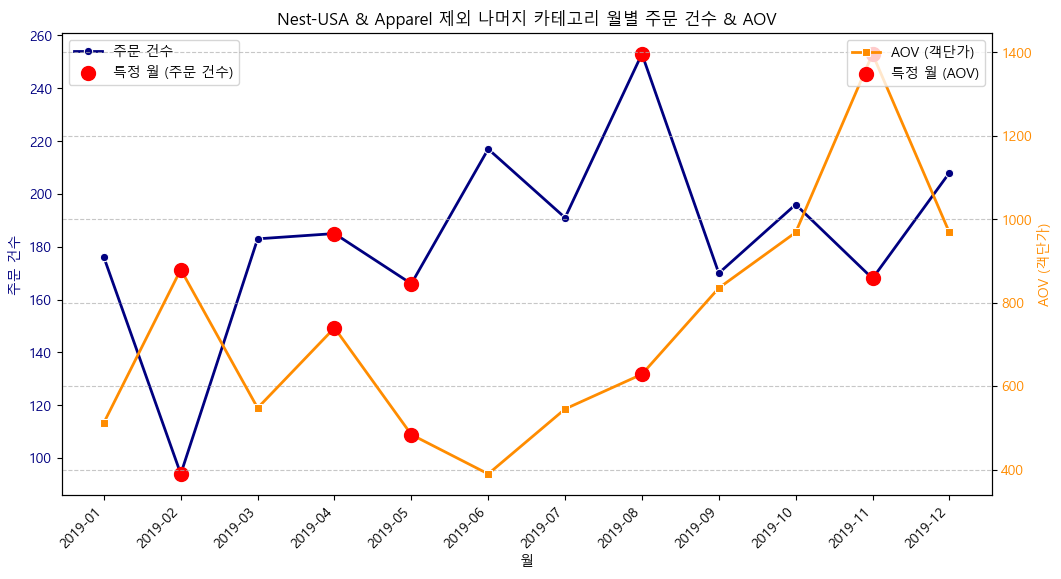

In [186]:

# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M').astype(str)

# Nest-USA & Apparel Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïπ¥ÌÖåÍ≥†Î¶¨ ÌïÑÌÑ∞ÎßÅ
df_other = df[~df['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'].isin(['Nest-USA', 'Apparel'])]

# ÏõîÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Í≥ÑÏÇ∞ (ÎèôÏùº Í≥†Í∞ù & ÎèôÏùº ÎÇ†ÏßúÏùò Ïó¨Îü¨ Í±∞Îûò IDÎäî 1Í±¥ÏúºÎ°ú Í∞ÑÏ£º)
df_other_orders = df_other.groupby(['Í±∞ÎûòÏõî', 'Í≥†Í∞ùID'])['Í±∞ÎûòID'].nunique().reset_index()
monthly_order_counts = df_other_orders.groupby('Í±∞ÎûòÏõî')['Í±∞ÎûòID'].count().reset_index()
monthly_order_counts.rename(columns={'Í±∞ÎûòID': 'Ï£ºÎ¨∏ Í±¥Ïàò'}, inplace=True)

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú ÏßëÍ≥Ñ
monthly_revenue = df_other.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# AOV (ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°) Í≥ÑÏÇ∞
monthly_aov = monthly_revenue.merge(monthly_order_counts, on='Í±∞ÎûòÏõî', how='left')
monthly_aov['AOV'] = monthly_aov['Ï¥ù Îß§Ï∂ú'] / monthly_aov['Ï£ºÎ¨∏ Í±¥Ïàò']

# ÌäπÏ†ï Ïõî ÌëúÏãú (2, 4, 5, 8, 11Ïõî)
highlight_months = ['2019-02', '2019-04', '2019-05', '2019-08', '2019-11']

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï£ºÎ¨∏ Í±¥Ïàò ÏÑ† Í∑∏ÎûòÌîÑ
sns.lineplot(data=monthly_aov, x='Í±∞ÎûòÏõî', y='Ï£ºÎ¨∏ Í±¥Ïàò', color='navy', marker='o', linewidth=2, ax=ax1, label="Ï£ºÎ¨∏ Í±¥Ïàò")
ax1.set_ylabel("Ï£ºÎ¨∏ Í±¥Ïàò", color='navy')
ax1.set_xlabel("Ïõî")
ax1.set_title("Nest-USA & Apparel Ï†úÏô∏ ÎÇòÎ®∏ÏßÄ Ïπ¥ÌÖåÍ≥†Î¶¨ ÏõîÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò & AOV")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(monthly_aov['Í±∞ÎûòÏõî'], rotation=45, ha='right')

# AOV ÏÑ† Í∑∏ÎûòÌîÑ (Î≥¥Ï°∞Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_aov, x='Í±∞ÎûòÏõî', y='AOV', color='darkorange', marker='s', linewidth=2, ax=ax2, label="AOV (Í∞ùÎã®Í∞Ä)")
ax2.set_ylabel("AOV (Í∞ùÎã®Í∞Ä)", color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# ÌäπÏ†ï Ïõî(2, 4, 5, 8, 11Ïõî)Ïóê Îπ®Í∞Ñ Ï†ê ÌëúÏãú
highlight_data = monthly_aov[monthly_aov['Í±∞ÎûòÏõî'].isin(highlight_months)]
ax1.scatter(highlight_data['Í±∞ÎûòÏõî'], highlight_data['Ï£ºÎ¨∏ Í±¥Ïàò'], color='red', s=100, zorder=3, label="ÌäπÏ†ï Ïõî (Ï£ºÎ¨∏ Í±¥Ïàò)")
ax2.scatter(highlight_data['Í±∞ÎûòÏõî'], highlight_data['AOV'], color='red', s=100, zorder=3, label="ÌäπÏ†ï Ïõî (AOV)")

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


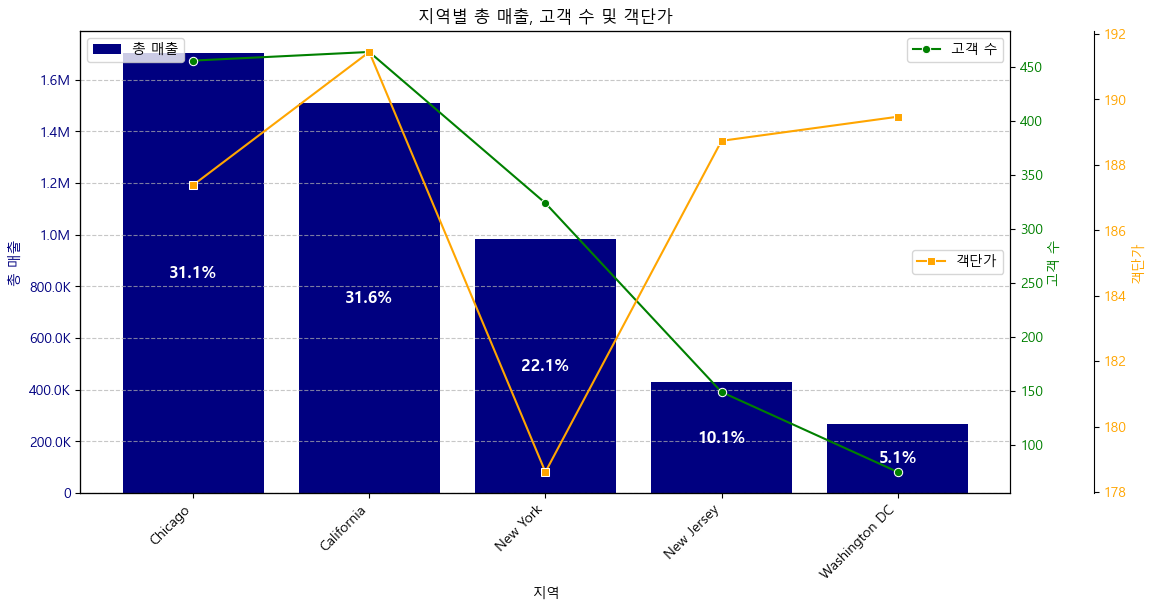

In [195]:

# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏßÄÏó≠Î≥Ñ Ï¥ù Îß§Ï∂ú, Í≥†Í∞ù Ïàò, Í∞ùÎã®Í∞Ä Í≥ÑÏÇ∞
region_sales = df.groupby('Í≥†Í∞ùÏßÄÏó≠').agg({'Ï¥ù Îß§Ï∂ú': 'sum', 'Í≥†Í∞ùID': 'nunique', 'Í±∞ÎûòID': 'nunique'}).reset_index()
region_sales.rename(columns={'Í≥†Í∞ùID': 'Í≥†Í∞ù Ïàò', 'Í±∞ÎûòID': 'Ï£ºÎ¨∏ Í±¥Ïàò'}, inplace=True)

# Ï†ÑÏ≤¥ Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
total_customers = region_sales['Í≥†Í∞ù Ïàò'].sum()

# ÏßÄÏó≠Î≥Ñ Í≥†Í∞ù ÎπÑÏú® (%) Í≥ÑÏÇ∞
region_sales['Í≥†Í∞ù ÎπÑÏú®(%)'] = (region_sales['Í≥†Í∞ù Ïàò'] / total_customers) * 100

# Í∞ùÎã®Í∞Ä(AOV) Í≥ÑÏÇ∞
region_sales['Í∞ùÎã®Í∞Ä'] = region_sales['Ï¥ù Îß§Ï∂ú'] / region_sales['Ï£ºÎ¨∏ Í±¥Ïàò']

# ÏßÄÏó≠Î≥Ñ Ï†ïÎ†¨ (Îß§Ï∂ú Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú)
region_sales = region_sales.sort_values(by='Ï¥ù Îß§Ï∂ú', ascending=False)

# YÏ∂ï Îã®ÏúÑ Î≥ÄÌôò Ìï®Ïàò (K=Ï≤ú Îã®ÏúÑ, M=Î∞±Îßå Îã®ÏúÑ)
def format_y_axis(value, _):
    if value >= 1_000_000:
        return f'{value/1_000_000:.1f}M'  # Î∞±Îßå Îã®ÏúÑ
    elif value >= 1_000:
        return f'{value/1_000:.1f}K'  # Ï≤ú Îã®ÏúÑ
    else:
        return f'{value:.0f}'  # Í∏∞Î≥∏

# ÏãúÍ∞ÅÌôî ÏΩîÎìú
fig, ax1 = plt.subplots(figsize=(12, 6))

# ÏßÄÏó≠Î≥Ñ Ï¥ù Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars = ax1.bar(region_sales['Í≥†Í∞ùÏßÄÏó≠'], region_sales['Ï¥ù Îß§Ï∂ú'], color='navy', label="Ï¥ù Îß§Ï∂ú")
ax1.set_ylabel("Ï¥ù Îß§Ï∂ú", color='navy')
ax1.set_xlabel("ÏßÄÏó≠")
ax1.set_title("ÏßÄÏó≠Î≥Ñ Ï¥ù Îß§Ï∂ú, Í≥†Í∞ù Ïàò Î∞è Í∞ùÎã®Í∞Ä")
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(region_sales['Í≥†Í∞ùÏßÄÏó≠'], rotation=45, ha='right')

# YÏ∂ï Îß§Ï∂ú Îã®ÏúÑ Î≥ÄÌôò Ï†ÅÏö©
ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

# ÎßâÎåÄ ÏïàÏóê Í≥†Í∞ù ÎπÑÏú®(%) ÌôîÏù¥Ìä∏ Ïª¨Îü¨Î°ú ÌëúÏãú
for bar, ratio in zip(bars, region_sales['Í≥†Í∞ù ÎπÑÏú®(%)']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 0.5, f'{ratio:.1f}%', 
             ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Í≥†Í∞ù Ïàò Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ (Ï¥àÎ°ùÏÉâ)
ax2 = ax1.twinx()
sns.lineplot(data=region_sales, x='Í≥†Í∞ùÏßÄÏó≠', y='Í≥†Í∞ù Ïàò', color='green', marker='o', ax=ax2, label="Í≥†Í∞ù Ïàò")
ax2.set_ylabel("Í≥†Í∞ù Ïàò", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Í∞ùÎã®Í∞Ä Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ (Ï£ºÌô©ÏÉâ)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))  # ÏÑ∏ Î≤àÏß∏ Ï∂ï ÏúÑÏπò Ï°∞Ï†ï
sns.lineplot(data=region_sales, x='Í≥†Í∞ùÏßÄÏó≠', y='Í∞ùÎã®Í∞Ä', color='orange', marker='s', ax=ax3, label="Í∞ùÎã®Í∞Ä")
ax3.set_ylabel("Í∞ùÎã®Í∞Ä", color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()


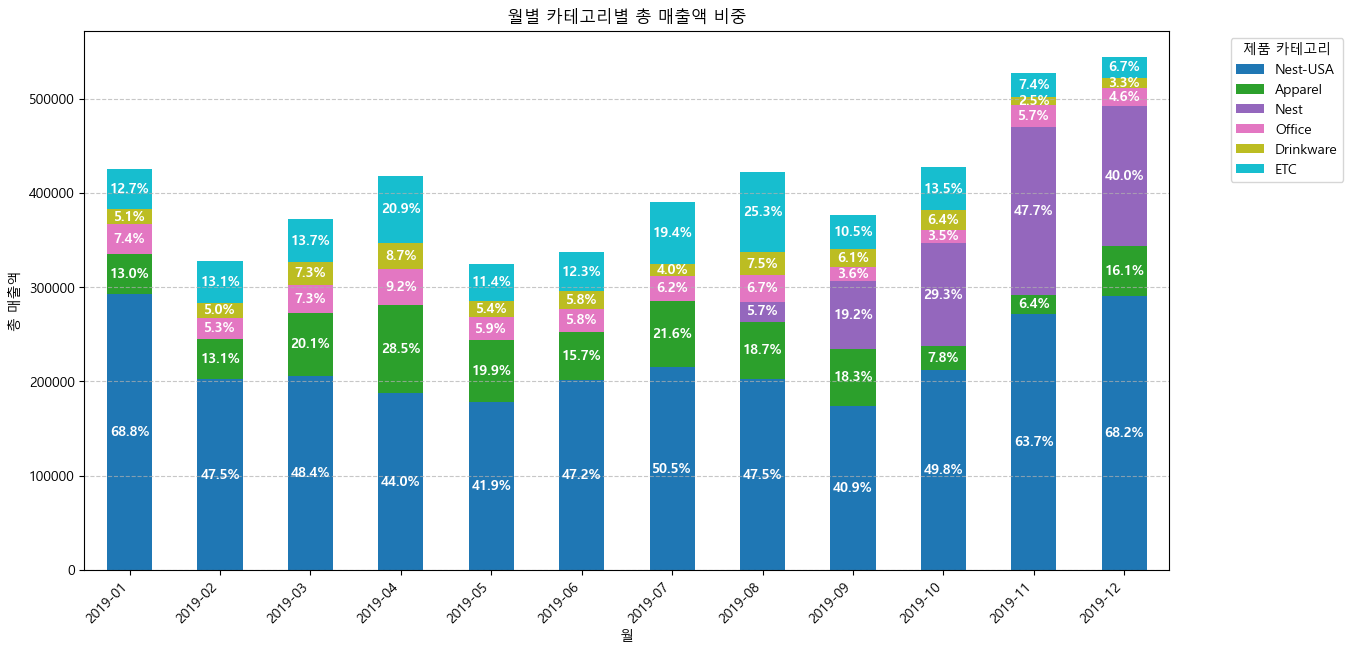

In [ ]:
# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# ÏõîÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
category_sales = df.groupby(['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Í∞ÄÏû• Îß§Ï∂úÏù¥ ÎÜíÏùÄ ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÑ†ÌÉù (Ï†ÑÏ≤¥ Í∏∞Í∞Ñ Í∏∞Ï§Ä)
top_categories = category_sales.groupby('Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨')['Ï¥ù Îß§Ï∂ú'].sum().nlargest(5).index

# ETC Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Î¨∂Í∏∞
category_sales['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'] = category_sales['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'].apply(lambda x: x if x in top_categories else 'ETC')

# Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ†¨ (ETCÎ•º ÎßàÏßÄÎßâÏúºÎ°ú Ïù¥Îèô)
category_sales['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'] = pd.Categorical(category_sales['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'], categories=list(top_categories) + ['ETC'], ordered=True)

# Îç∞Ïù¥ÌÑ∞ ÌîºÎ≤ó
category_pivot = category_sales.pivot_table(index='Í±∞ÎûòÏõî', columns='Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨', values='Ï¥ù Îß§Ï∂ú', aggfunc='sum')

# ÏãúÍ∞ÅÌôî (Stacked Bar Chart)
fig, ax = plt.subplots(figsize=(14, 7))

bars = category_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab10', ax=ax)

# ÎπÑÏú®(%) ÌëúÏãú
for i, bar_container in enumerate(bars.containers):
    for bar in bar_container:
        if bar.get_height() > 0:  # Í∞íÏù¥ ÏûàÎäî Í≤ΩÏö∞Îßå ÌëúÏãú
            total_monthly_sales = category_pivot.iloc[i].sum()  # Ìï¥Îãπ ÏõîÏùò Ï¥ù Îß§Ï∂ú
            height = bar.get_y() + bar.get_height() / 2  # ÎßâÎåÄ Ï§ëÏïô
            percentage = (bar.get_height() / total_monthly_sales) * 100
            ax.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", 
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù Îß§Ï∂úÏï°")
plt.title("ÏõîÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï¥ù Îß§Ï∂úÏï° ÎπÑÏ§ë")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Ï†úÌíà Ïπ¥ÌÖåÍ≥†Î¶¨", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

In [198]:
# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í±∞ÎûòÏõî Ïª¨Îüº ÏÉùÏÑ±
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M').astype(str)

# 8~12Ïõî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_filtered = df[(df['Í±∞ÎûòÏõî'] >= '2019-08') & (df['Í±∞ÎûòÏõî'] <= '2019-12')]

# Apparel Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÏÑ†ÌÉù
df_apparel = df_filtered[df_filtered['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'] == 'Apparel']

# ÏßÄÏó≠Î≥Ñ & ÏõîÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
region_sales_apparel = df_apparel.groupby(['Í±∞ÎûòÏõî', 'Í≥†Í∞ùÏßÄÏó≠'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôò (Ìñâ: Í±∞ÎûòÏõî, Ïó¥: ÏßÄÏó≠, Í∞í: Îß§Ï∂úÏï°)
region_sales_pivot = region_sales_apparel.pivot(index='Í±∞ÎûòÏõî', columns='Í≥†Í∞ùÏßÄÏó≠', values='Ï¥ù Îß§Ï∂ú').fillna(0)
region_sales_pivot

Í≥†Í∞ùÏßÄÏó≠     California   Chicago  New Jersey  New York  Washington DC
Í±∞ÎûòÏõî                                                               
2019-08    16391.56  22358.14     3975.69  14845.88        3773.37
2019-09    17640.62  22543.74     9050.38   6533.29        4309.79
2019-10     6590.43   9642.78     2001.92   5452.25        1797.05
2019-11     5883.36   6902.13     1881.22   4986.37        1350.00
2019-12    13550.07  28573.51     4008.86   5480.45        1273.88

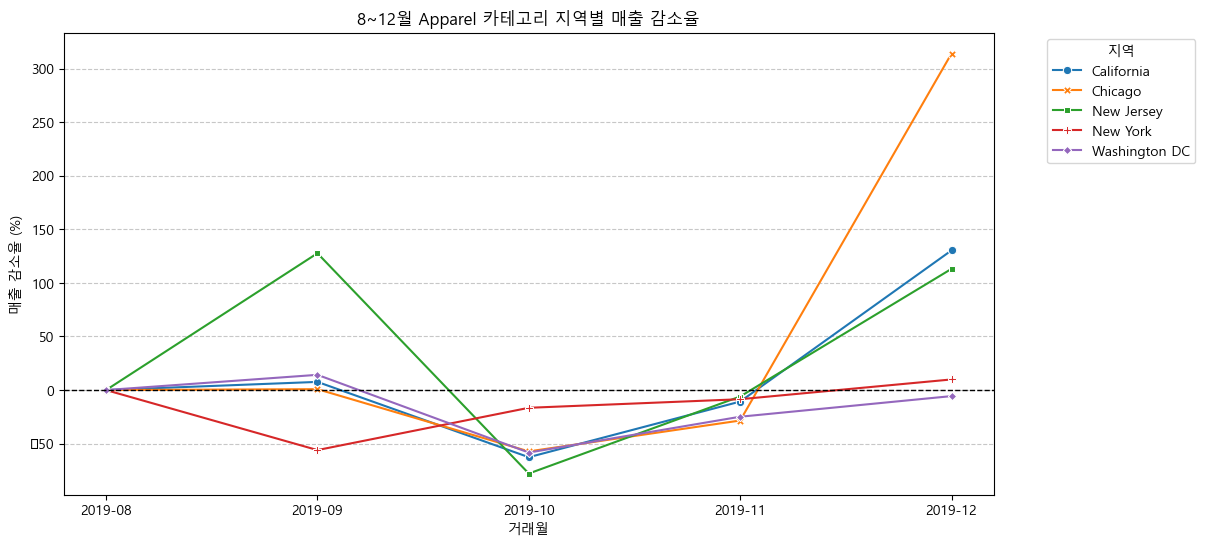

In [ ]:

# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í±∞ÎûòÏõî Ïª¨Îüº ÏÉùÏÑ±
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M').astype(str)

# 8~12Ïõî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_filtered = df[(df['Í±∞ÎûòÏõî'] >= '2019-08') & (df['Í±∞ÎûòÏõî'] <= '2019-12')]

# Apparel Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÏÑ†ÌÉù
df_apparel = df_filtered[df_filtered['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'] == 'Apparel']

# ÏßÄÏó≠Î≥Ñ & ÏõîÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
region_sales_apparel = df_apparel.groupby(['Í±∞ÎûòÏõî', 'Í≥†Í∞ùÏßÄÏó≠'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# ÌîºÎ≤ó ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôò (Ìñâ: Í±∞ÎûòÏõî, Ïó¥: ÏßÄÏó≠, Í∞í: Îß§Ï∂úÏï°)
region_sales_pivot = region_sales_apparel.pivot(index='Í±∞ÎûòÏõî', columns='Í≥†Í∞ùÏßÄÏó≠', values='Ï¥ù Îß§Ï∂ú').fillna(0)

# Îß§Ï∂ú Í∞êÏÜåÏú® Í≥ÑÏÇ∞ (Ï†ÑÏõî ÎåÄÎπÑ Î≥ÄÌôîÏú®)
region_sales_pct_change = region_sales_pivot.pct_change().fillna(0) * 100

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_sales_pct_change, markers=True, dashes=False)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # 0% Î≥ÄÌôîÏÑ† Ï∂îÍ∞Ä
plt.xlabel("Í±∞ÎûòÏõî")
plt.ylabel("Îß§Ï∂ú Í∞êÏÜåÏú® (%)")
plt.title("8~12Ïõî Apparel Ïπ¥ÌÖåÍ≥†Î¶¨ ÏßÄÏó≠Î≥Ñ Îß§Ï∂ú Í∞êÏÜåÏú®")
plt.legend(title="ÏßÄÏó≠", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


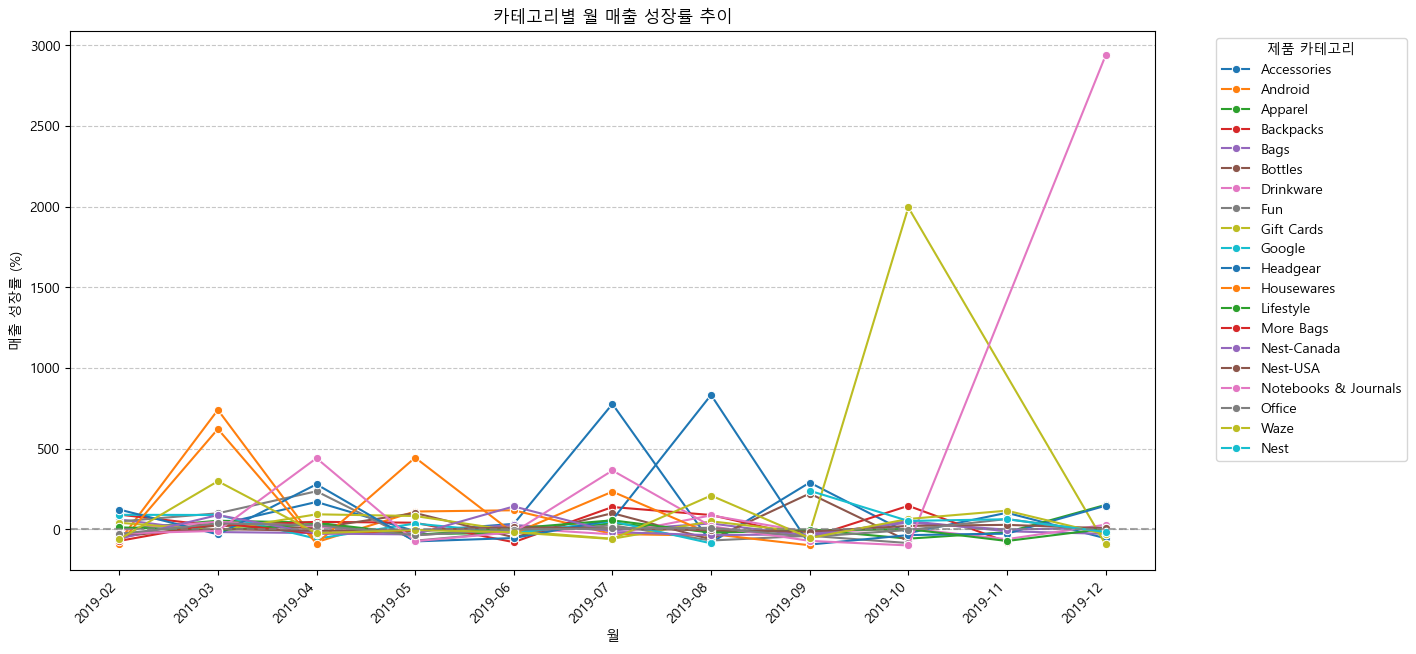

In [ ]:
# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# ÏõîÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
category_sales = df.groupby(['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÑ±Ïû•Î•† Í≥ÑÏÇ∞ (Ïù¥Ï†Ñ Îã¨ ÎåÄÎπÑ Î≥ÄÌôîÏú®)
category_sales['Ï†ÑÏõî Îß§Ï∂ú'] = category_sales.groupby('Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨')['Ï¥ù Îß§Ï∂ú'].shift(1)
category_sales['Îß§Ï∂ú ÏÑ±Ïû•Î•†(%)'] = ((category_sales['Ï¥ù Îß§Ï∂ú'] - category_sales['Ï†ÑÏõî Îß§Ï∂ú']) / category_sales['Ï†ÑÏõî Îß§Ï∂ú']) * 100

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò
category_sales['Í±∞ÎûòÏõî'] = category_sales['Í±∞ÎûòÏõî'].astype(str)

# ÏãúÍ∞ÅÌôî ÏΩîÎìú
plt.figure(figsize=(14, 7))
sns.lineplot(data=category_sales, x='Í±∞ÎûòÏõî', y='Îß§Ï∂ú ÏÑ±Ïû•Î•†(%)', hue='Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨', marker='o', palette='tab10')

plt.xlabel("Ïõî")
plt.ylabel("Îß§Ï∂ú ÏÑ±Ïû•Î•† (%)")
plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ïõî Îß§Ï∂ú ÏÑ±Ïû•Î•† Ï∂îÏù¥")
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)  # Í∏∞Ï§ÄÏÑ†(0%) Ï∂îÍ∞Ä
plt.xticks(rotation=45, ha='right')
plt.legend(title="Ï†úÌíà Ïπ¥ÌÖåÍ≥†Î¶¨", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

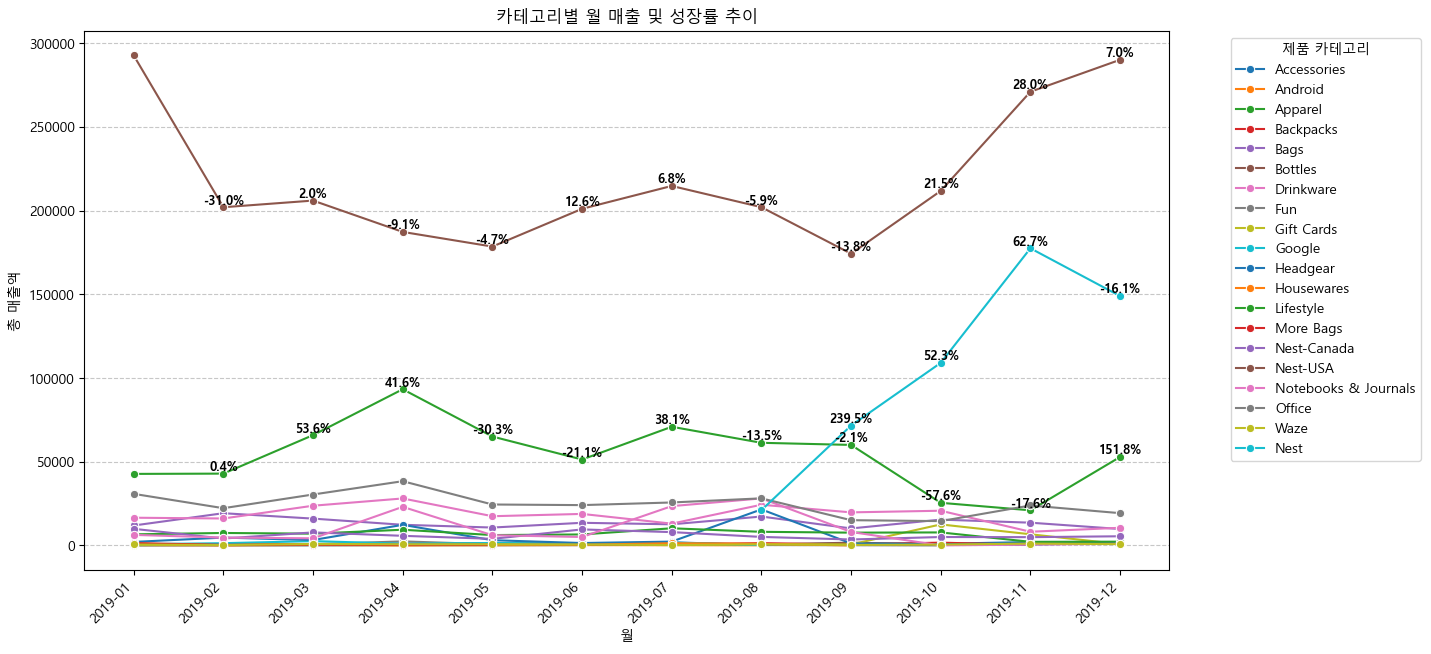

In [ ]:
# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# ÏõîÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
category_sales = df.groupby(['Í±∞ÎûòÏõî', 'Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨'])['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÑ±Ïû•Î•† Í≥ÑÏÇ∞ (Ïù¥Ï†Ñ Îã¨ ÎåÄÎπÑ Î≥ÄÌôîÏú®)
category_sales['Ï†ÑÏõî Îß§Ï∂ú'] = category_sales.groupby('Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨')['Ï¥ù Îß§Ï∂ú'].shift(1)
category_sales['Îß§Ï∂ú ÏÑ±Ïû•Î•†(%)'] = ((category_sales['Ï¥ù Îß§Ï∂ú'] - category_sales['Ï†ÑÏõî Îß§Ï∂ú']) / category_sales['Ï†ÑÏõî Îß§Ï∂ú']) * 100

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò
category_sales['Í±∞ÎûòÏõî'] = category_sales['Í±∞ÎûòÏõî'].astype(str)

# ÏãúÍ∞ÅÌôî ÏΩîÎìú
plt.figure(figsize=(14, 7))

# Îß§Ï∂úÏï° ÎùºÏù∏ Í∑∏ÎûòÌîÑ
sns.lineplot(data=category_sales, x='Í±∞ÎûòÏõî', y='Ï¥ù Îß§Ï∂ú', hue='Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨', marker='o', palette='tab10')

# ÏÑ±Ïû•Î•† %Î•º google, lifestyle, bottle Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÌëúÏãú
for i in range(len(category_sales)):
    category = category_sales.iloc[i]['Ï†úÌíàÏπ¥ÌÖåÍ≥†Î¶¨']
    if category in ['Nest', 'Apparel', 'Nest-USA']:
        if not pd.isna(category_sales.iloc[i]['Îß§Ï∂ú ÏÑ±Ïû•Î•†(%)']):  # NaN Í∞í Ï†úÏô∏
            plt.text(category_sales.iloc[i]['Í±∞ÎûòÏõî'], category_sales.iloc[i]['Ï¥ù Îß§Ï∂ú'],
                     f"{category_sales.iloc[i]['Îß§Ï∂ú ÏÑ±Ïû•Î•†(%)']:.1f}%", 
                     ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù Îß§Ï∂úÏï°")
plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ïõî Îß§Ï∂ú Î∞è ÏÑ±Ïû•Î•† Ï∂îÏù¥")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Ï†úÌíà Ïπ¥ÌÖåÍ≥†Î¶¨", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()


In [ ]:


# Í±∞Îûò ÎÇ†ÏßúÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# Í≥†Í∞ùÎ≥Ñ Ï¥ù Îß§Ï∂úÏï° Í≥ÑÏÇ∞
ltv = df.groupby('Í≥†Í∞ùID').agg({'Ï¥ù Îß§Ï∂ú': 'sum'}).rename(columns={'Ï¥ù Îß§Ï∂ú': 'Ï¥ùÍµ¨Îß§Í∏àÏï°'})

# Í≥†Í∞ùÎ≥Ñ Ïã§Ï†ú Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞ (ÎèôÏùº Í≥†Í∞ùÏù¥ Í∞ôÏùÄ ÎÇ† Ïó¨Îü¨ Î≤à Íµ¨Îß§Ìïú Í≤ΩÏö∞ 1Î≤àÏúºÎ°ú Í≥ÑÏÇ∞)
unique_transactions = df.groupby(['Í≥†Í∞ùID', 'Í±∞ÎûòÎÇ†Ïßú']).size().reset_index().groupby('Í≥†Í∞ùID').size().reset_index()
unique_transactions.rename(columns={0: 'Íµ¨Îß§ÌöüÏàò'}, inplace=True)

# Íµ¨Îß§ ÌöüÏàòÎ•º LTV Îç∞Ïù¥ÌÑ∞Ïóê Î≥ëÌï©
ltv = ltv.merge(unique_transactions, on='Í≥†Í∞ùID', how='left')

# ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï° Í≥ÑÏÇ∞
ltv['ÌèâÍ∑†Íµ¨Îß§Í∏àÏï°'] = ltv['Ï¥ùÍµ¨Îß§Í∏àÏï°'] / ltv['Íµ¨Îß§ÌöüÏàò']

# 2019ÎÖÑ 1ÎÖÑÍ∞ÑÏùò Íµ¨Îß§Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú ÌèâÍ∑†Íµ¨Îß§ÎπàÎèÑÎ•º 365Ïùº Í∏∞Ï§ÄÏúºÎ°ú Í≥ÑÏÇ∞
ltv['ÌèâÍ∑†Íµ¨Îß§ÎπàÎèÑ'] = ltv['Íµ¨Îß§ÌöüÏàò'] / 365

# Í≥†Í∞ùÎ≥Ñ 2019ÎÖÑ Ï≤´ Í±∞ÎûòÏùº Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏûÖ Í∏∞Í∞Ñ Í≥ÑÏÇ∞ (Ïõî Îã®ÏúÑ)
first_purchase = df.groupby('Í≥†Í∞ùID')['Í±∞ÎûòÎÇ†Ïßú'].min().reset_index()  # ÏµúÏ¥à Í±∞Îûò ÎÇ†Ïßú
first_purchase.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Ï≤´Í±∞ÎûòÏùº'}, inplace=True)

# Í≥†Í∞ùÎ≥Ñ Í∞ÄÏûÖÍ∏∞Í∞ÑÏùÑ Ïõî Îã®ÏúÑÎ°ú Í≥ÑÏÇ∞
df = df.merge(first_purchase, on='Í≥†Í∞ùID', how='left')
df['Í∞ÄÏûÖÍ∏∞Í∞Ñ(Ïõî)'] = ((df['Í±∞ÎûòÎÇ†Ïßú'].dt.year - df['Ï≤´Í±∞ÎûòÏùº'].dt.year) * 12 +
                     (df['Í±∞ÎûòÎÇ†Ïßú'].dt.month - df['Ï≤´Í±∞ÎûòÏùº'].dt.month))

# Í∞ÄÏûÖ Í∏∞Í∞ÑÏùÑ ÎÖÑ Îã®ÏúÑÎ°ú Î≥ÄÌôò
df['Í∞ÄÏûÖÍ∏∞Í∞Ñ(ÎÖÑ)'] = df['Í∞ÄÏûÖÍ∏∞Í∞Ñ(Ïõî)'] / 12

# Í≥†Í∞ùÎ≥Ñ Í∞ÄÏûÖÍ∏∞Í∞Ñ ÏµúÏã† Í∞í Ïú†ÏßÄ (ÏµúÏã† Í±∞Îûò Í∏∞Ï§Ä)
latest_join_duration = df.groupby('Í≥†Í∞ùID')['Í∞ÄÏûÖÍ∏∞Í∞Ñ(ÎÖÑ)'].max().reset_index()

# LTV Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï©
ltv = pd.merge(ltv, latest_join_duration, on='Í≥†Í∞ùID', how='left')

# Í≥†Í∞ùÏÉùÏï†Í∞ÄÏπò(LTV) Í≥ÑÏÇ∞ (Í∞ÄÏûÖÍ∏∞Í∞ÑÏùÑ 2019ÎÖÑ Ï≤´ Í±∞ÎûòÏùºÎ∂ÄÌÑ∞ Í≥ÑÏÇ∞)
ltv['Í≥†Í∞ùÏÉùÏï†Í∞ÄÏπò'] = ltv['Í∞ÄÏûÖÍ∏∞Í∞Ñ(ÎÖÑ)'] * ltv['ÌèâÍ∑†Íµ¨Îß§Í∏àÏï°'] * ltv['ÌèâÍ∑†Íµ¨Îß§ÎπàÎèÑ']

# LTV ÏÉÅÏúÑ 10Î™Ö Ï∂îÏ∂ú
ltv_top10 = ltv.nlargest(10, 'Í≥†Í∞ùÏÉùÏï†Í∞ÄÏπò')

# Í≤∞Í≥º Ï∂úÎ†•
ltv_top10


Í≥†Í∞ùID     Ï¥ùÍµ¨Îß§Í∏àÏï°  Íµ¨Îß§ÌöüÏàò       ÌèâÍ∑†Íµ¨Îß§Í∏àÏï°    ÌèâÍ∑†Íµ¨Îß§ÎπàÎèÑ   Í∞ÄÏûÖÍ∏∞Í∞Ñ(ÎÖÑ)      Í≥†Í∞ùÏÉùÏï†Í∞ÄÏπò
736   USER_0736  78269.43    24  3261.226250  0.065753  0.916667  196.567062
563   USER_0563  59673.78    27  2210.140000  0.073973  0.916667  149.865658
118   USER_0118  78215.54    34  2300.457059  0.093151  0.666667  142.859434
643   USER_0643  51624.72    26  1985.566154  0.071233  0.916667  129.651123
1355  USER_1355  48538.24    20  2426.912000  0.054795  0.916667  121.899689
202   USER_0202  28485.71    20  1424.285500  0.054795  0.833333   65.035868
667   USER_0667  28241.77     8  3530.221250  0.021918  0.750000   58.031034
447   USER_0447  21588.01    10  2158.801000  0.027397  0.916667   54.216463
703   USER_0703  23979.69     7  3425.670000  0.019178  0.750000   49.273336
850   USER_0850  21544.43     7  3077.775714  0.019178  0.833333   49.188196

In [ ]:
# Ï†ÑÏ≤¥ Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
total_customers = len(ltv)

# ÏÉÅÏúÑ 20% Í≥†Í∞ù Ïàò Í≥ÑÏÇ∞
top_20_pct_count = int(total_customers * 0.2)

# LTV Í∏∞Ï§Ä ÏÉÅÏúÑ 20% Í≥†Í∞ù Ï∂îÏ∂ú
ltv_sorted = ltv.sort_values(by='Í≥†Í∞ùÏÉùÏï†Í∞ÄÏπò', ascending=False)
ltv_top_20 = ltv_sorted.head(top_20_pct_count)

# Ï†ÑÏ≤¥ Îß§Ï∂úÍ≥º ÏÉÅÏúÑ 20% Í≥†Í∞ù Îß§Ï∂ú Ìï©Í≥Ñ Í≥ÑÏÇ∞
total_revenue = ltv['Ï¥ùÍµ¨Îß§Í∏àÏï°'].sum()
top_20_revenue = ltv_top_20['Ï¥ùÍµ¨Îß§Í∏àÏï°'].sum()

# ÏÉÅÏúÑ 20% Í≥†Í∞ùÏùò Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%) Í≥ÑÏÇ∞
top_20_pct_revenue_ratio = (top_20_revenue / total_revenue) * 100

# Í≤∞Í≥º Ï∂úÎ†•
print(f"ÏÉÅÏúÑ 20% Í≥†Í∞ùÏùò Ï¥ù Îß§Ï∂ú Ìï©Í≥Ñ: {top_20_revenue:,.0f}")
print(f"Ï†ÑÏ≤¥ Îß§Ï∂ú: {total_revenue:,.0f}")
print(f"ÏÉÅÏúÑ 20% Í≥†Í∞ùÏù¥ Ï†ÑÏ≤¥ Îß§Ï∂úÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏú®: {top_20_pct_revenue_ratio:.2f}%")


ÏÉÅÏúÑ 20% Í≥†Í∞ùÏùò Ï¥ù Îß§Ï∂ú Ìï©Í≥Ñ: 2,477,737
Ï†ÑÏ≤¥ Îß§Ï∂ú: 4,891,317
ÏÉÅÏúÑ 20% Í≥†Í∞ùÏù¥ Ï†ÑÏ≤¥ Îß§Ï∂úÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏú®: 50.66%


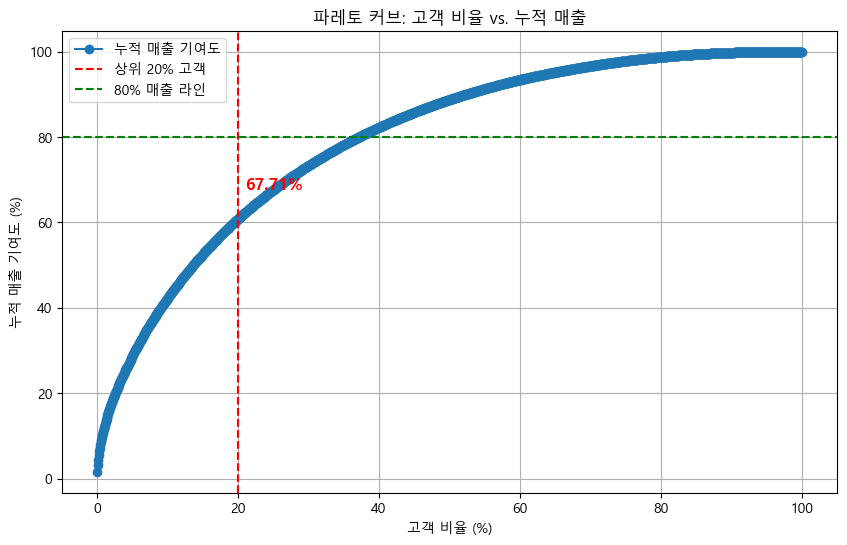

In [ ]:

# Í≥†Í∞ùÎ≥Ñ Ï¥ù Íµ¨Îß§Í∏àÏï° Í∏∞Ï§Ä Ï†ïÎ†¨
ltv_sorted = ltv.sort_values(by='Ï¥ùÍµ¨Îß§Í∏àÏï°', ascending=False)

# ÎàÑÏ†Å Îß§Ï∂ú ÎπÑÏú® Í≥ÑÏÇ∞
ltv_sorted['ÎàÑÏ†ÅÎß§Ï∂úÎπÑÏú®'] = ltv_sorted['Ï¥ùÍµ¨Îß§Í∏àÏï°'].cumsum() / ltv_sorted['Ï¥ùÍµ¨Îß§Í∏àÏï°'].sum()

# Í≥†Í∞ù ÎπÑÏú® (ÎàÑÏ†Å)
ltv_sorted['Í≥†Í∞ùÎπÑÏú®'] = np.arange(1, len(ltv_sorted) + 1) / len(ltv_sorted)

# ÏÉÅÏúÑ 20% Í≥†Í∞ùÏù¥ Ï∞®ÏßÄÌïòÎäî ÎàÑÏ†Å Îß§Ï∂ú ÎπÑÏú® Ï∞æÍ∏∞
top_20_percent_value = ltv_sorted.loc[int(len(ltv_sorted) * 0.2), 'ÎàÑÏ†ÅÎß§Ï∂úÎπÑÏú®'] * 100  # % Î≥ÄÌôò

# ÌååÎ†àÌÜ† Ïª§Î∏å ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(ltv_sorted['Í≥†Í∞ùÎπÑÏú®'] * 100, ltv_sorted['ÎàÑÏ†ÅÎß§Ï∂úÎπÑÏú®'] * 100, marker='o', linestyle='-', label="ÎàÑÏ†Å Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ")

# 20% Í≥†Í∞ù ÏßÄÏ†êÏóê ÏÑ∏Î°úÏÑ† Ï∂îÍ∞Ä
plt.axvline(x=20, color='r', linestyle='--', label="ÏÉÅÏúÑ 20% Í≥†Í∞ù")

# 80% Îß§Ï∂ú ÎùºÏù∏ Í∞ÄÎ°úÏÑ† Ï∂îÍ∞Ä
plt.axhline(y=80, color='g', linestyle='--', label="80% Îß§Ï∂ú ÎùºÏù∏")

# ÏÉÅÏúÑ 20% Í≥†Í∞ù Í∏∞Ïó¨ÎèÑ ÏàòÏπò ÌëúÏãú
plt.text(21, top_20_percent_value, f"{top_20_percent_value:.2f}%", fontsize=12, color='red', fontweight='bold')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xlabel("Í≥†Í∞ù ÎπÑÏú® (%)")
plt.ylabel("ÎàÑÏ†Å Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)")
plt.title("ÌååÎ†àÌÜ† Ïª§Î∏å: Í≥†Í∞ù ÎπÑÏú® vs. ÎàÑÏ†Å Îß§Ï∂ú")
plt.legend()
plt.grid()
plt.show()



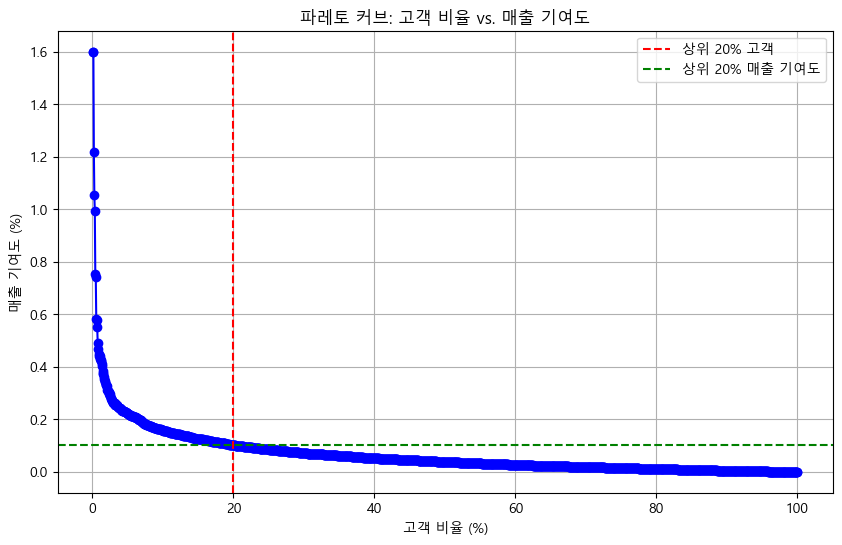

In [ ]:

# Í≥†Í∞ùÎ≥Ñ Ï¥ù Îß§Ï∂ú Ï†ïÎ†¨ (ÎÇ¥Î¶ºÏ∞®Ïàú)
ltv_sorted = ltv[['Í≥†Í∞ùID', 'Ï¥ùÍµ¨Îß§Í∏àÏï°']].sort_values(by='Ï¥ùÍµ¨Îß§Í∏àÏï°', ascending=False).reset_index(drop=True)

# Ï†ÑÏ≤¥ Îß§Ï∂ú Í≥ÑÏÇ∞
total_sales = ltv_sorted['Ï¥ùÍµ¨Îß§Í∏àÏï°'].sum()

# Í∞Å Í≥†Í∞ùÏùò Í∞úÎ≥Ñ Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%) Í≥ÑÏÇ∞
ltv_sorted['Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)'] = (ltv_sorted['Ï¥ùÍµ¨Îß§Í∏àÏï°'] / total_sales) * 100

# Í≥†Í∞ù ÎπÑÏú® (%) Í≥ÑÏÇ∞
ltv_sorted['Í≥†Í∞ù ÎπÑÏú® (%)'] = (np.arange(1, len(ltv_sorted) + 1) / len(ltv_sorted)) * 100

# üìà Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ(%) vs. Í≥†Í∞ù ÎπÑÏú®(%) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(ltv_sorted['Í≥†Í∞ù ÎπÑÏú® (%)'], ltv_sorted['Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)'], marker='o', linestyle='-', color='b')

# ÏÉÅÏúÑ 20% Í≥†Í∞ù ÏßÄÏ†ê Í∞ïÏ°∞
top_20_percent_idx = int(len(ltv_sorted) * 0.2)
plt.axvline(x=20, color='red', linestyle='dashed', label="ÏÉÅÏúÑ 20% Í≥†Í∞ù")
plt.axhline(y=ltv_sorted.loc[top_20_percent_idx, 'Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)'], color='green', linestyle='dashed', label="ÏÉÅÏúÑ 20% Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xlabel("Í≥†Í∞ù ÎπÑÏú® (%)")
plt.ylabel("Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)")
plt.title("ÌååÎ†àÌÜ† Ïª§Î∏å: Í≥†Í∞ù ÎπÑÏú® vs. Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ")
plt.legend()
plt.grid()

plt.show()


In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Îã§Ïãú Î°úÎìú
import pandas as pd
import numpy as np

# Í∞ÄÏÉÅÏùò Í≥†Í∞ùÎ≥Ñ Îß§Ï∂ú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï¥àÍ∏∞ÌôîÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Ïû¨Íµ¨ÏÑ±)
np.random.seed(42)
customer_count = 1400
customer_ids = [f"CUST_{i}" for i in range(1, customer_count + 1)]
total_sales = np.random.exponential(scale=1000, size=customer_count)  # Í≥†Í∞ùÎ≥Ñ Ï¥ù Îß§Ï∂ú (ÏûÑÏùò Î∂ÑÌè¨)

# LTV Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
ltv_df = pd.DataFrame({"Í≥†Í∞ùID": customer_ids, "Ï¥ùÍµ¨Îß§Í∏àÏï°": total_sales})

# Í≥†Í∞ùÎ≥Ñ Îß§Ï∂úÏùÑ ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
ltv_df = ltv_df.sort_values(by="Ï¥ùÍµ¨Îß§Í∏àÏï°", ascending=False)

# Ï¥ù Îß§Ï∂ú Ìï©ÏÇ∞
total_revenue = ltv_df["Ï¥ùÍµ¨Îß§Í∏àÏï°"].sum()

# Í≥†Í∞ùÎ≥Ñ ÎàÑÏ†Å Îß§Ï∂ú Í≥ÑÏÇ∞
ltv_df["ÎàÑÏ†Å Îß§Ï∂ú"] = ltv_df["Ï¥ùÍµ¨Îß§Í∏àÏï°"].cumsum()

# Í≥†Í∞ù ÎπÑÏú® Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ Í≥†Í∞ù ÎåÄÎπÑ ÎàÑÏ†Å %)
ltv_df["Í≥†Í∞ù ÎπÑÏú® (%)"] = np.linspace(0, 100, len(ltv_df))

# ÎàÑÏ†Å Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)
ltv_df["ÎàÑÏ†Å Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)"] = (ltv_df["ÎàÑÏ†Å Îß§Ï∂ú"] / total_revenue) * 100

# 20% ÏßÄÏ†êÏóêÏÑúÏùò Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ ÌôïÏù∏
top_20_percent_value = ltv_df[ltv_df["Í≥†Í∞ù ÎπÑÏú® (%)"] <= 20]["ÎàÑÏ†Å Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)"].max()

# 80% Îß§Ï∂úÏùÑ Ï∞®ÏßÄÌïòÎäî Í≥†Í∞ù ÎπÑÏú® ÌôïÏù∏
eighty_percent_point = ltv_df[ltv_df["ÎàÑÏ†Å Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)"] >= 80]["Í≥†Í∞ù ÎπÑÏú® (%)"].min()

(top_20_percent_value, eighty_percent_point)


(np.float64(52.52703026913472), np.float64(43.245175125089354))

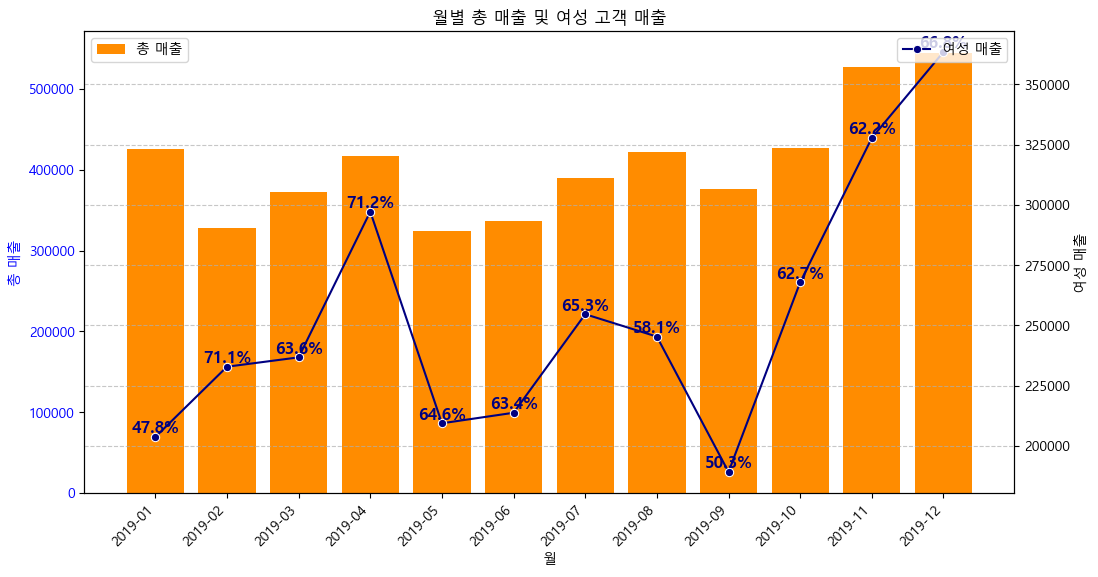

In [ ]:

# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df['Í±∞ÎûòÎÇ†Ïßú'] = pd.to_datetime(df['Í±∞ÎûòÎÇ†Ïßú'])

# ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Í≥ÑÏÇ∞
df['Í±∞ÎûòÏõî'] = df['Í±∞ÎûòÎÇ†Ïßú'].dt.to_period('M')

# Ï†ÑÏ≤¥ Îß§Ï∂ú ÏßëÍ≥Ñ
monthly_sales = df.groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÏßëÍ≥Ñ
female_sales = df[df['ÏÑ±Î≥Ñ'] == 'Ïó¨'].groupby('Í±∞ÎûòÏõî')['Ï¥ù Îß§Ï∂ú'].sum().reset_index()

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
monthly_sales = monthly_sales.merge(female_sales, on='Í±∞ÎûòÏõî', how='left', suffixes=('', '_Ïó¨ÏÑ±'))
monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'].fillna(0, inplace=True)

# Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú ÎπÑÏú® Í≥ÑÏÇ∞
monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'] = (monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'] / monthly_sales['Ï¥ù Îß§Ï∂ú']) * 100

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò (Ïò§Î•ò Î∞©ÏßÄ)
monthly_sales['Í±∞ÎûòÏõî'] = monthly_sales['Í±∞ÎûòÏõî'].astype(str)  # Period ‚Üí Î¨∏ÏûêÏó¥ Î≥ÄÌôò
monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'] = monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)'].astype(float)  # Ïà´ÏûêÎ°ú Î≥ÄÌôò

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï¥ù Îß§Ï∂ú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars = ax1.bar(monthly_sales['Í±∞ÎûòÏõî'], monthly_sales['Ï¥ù Îß§Ï∂ú'], color='darkorange', label="Ï¥ù Îß§Ï∂ú")
ax1.set_ylabel("Ï¥ù Îß§Ï∂ú", color='b')
ax1.set_xlabel("Ïõî")
ax1.set_title("ÏõîÎ≥Ñ Ï¥ù Îß§Ï∂ú Î∞è Ïó¨ÏÑ± Í≥†Í∞ù Îß§Ï∂ú")
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(monthly_sales['Í±∞ÎûòÏõî'], rotation=45, ha='right')

# Ïó¨ÏÑ± Îß§Ï∂ú Î≥¥Ï°∞ÏÑ† Í∑∏ÎûòÌîÑ (Ï¥ù Îß§Ï∂úÍ≥º ÎèôÏùºÌïú Ï∂ï ÏÇ¨Ïö©)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Í±∞ÎûòÏõî', y='Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±', color='navy', marker='o', ax=ax2, label="Ïó¨ÏÑ± Îß§Ï∂ú")
ax2.set_ylabel("Ïó¨ÏÑ± Îß§Ï∂ú", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®ÏùÑ ÏÑ† Í∑∏ÎûòÌîÑ ÏúÑÏóê ÌëúÏãú
for i, txt in enumerate(monthly_sales['Ïó¨ÏÑ± Îß§Ï∂ú ÎπÑÏú®(%)']):
    ax2.text(i, monthly_sales['Ï¥ù Îß§Ï∂ú_Ïó¨ÏÑ±'].iloc[i], f'{txt:.1f}%', 
             ha='center', va='bottom', fontsize=12, color='navy', fontweight='bold')

# Î≤îÎ°Ä Ï∂îÍ∞Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞Ïùò ÎßàÏßÄÎßâÎÇ† +1ÏùºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Recency Í≥ÑÏÇ∞
last = df['Í±∞ÎûòÎÇ†Ïßú'].max() + pd.DateOffset(days=1)

# RFM ÏßÄÌëú Í≥ÑÏÇ∞
rfm_df = df.groupby('Í≥†Í∞ùID').agg({
    'Í±∞ÎûòÎÇ†Ïßú': lambda x: (last - x.max()).days,  # Recency (ÏµúÏã†ÏÑ±)
    'Í±∞ÎûòID': 'nunique',  # Frequency (Íµ¨Îß§ ÎπàÎèÑ)
    'Ï¥ù Îß§Ï∂ú': 'sum'  # Monetary (Ï¥ù Íµ¨Îß§ Í∏àÏï°)
}).reset_index()

# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
rfm_df.rename(columns={'Í±∞ÎûòÎÇ†Ïßú': 'Recency',
                        'Í±∞ÎûòID': 'Frequency',
                        'Ï¥ù Îß§Ï∂ú': 'Monetary'
                       }, inplace=True)

# RFM Ï†êÏàòÌôî (1~5Ï†ê)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5,4,3,2,1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=5, labels=[1,2,3,4,5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1,2,3,4,5])

# Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Ï†ïÏùò
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# ÏµúÏ¢Ö RFM Ï†êÏàò (Ìï©ÏÇ∞ÌïòÏó¨ ÏµúÏö∞Ïàò Í≥†Í∞ù Î∂ÑÏÑù Í∞ÄÎä•)
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Í≤∞Í≥º Ï∂úÎ†•
rfm_df

Í≥†Í∞ùID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0     USER_0000      108          1     30.99       3       1       1   
1     USER_0001       60         31  14121.36       4       5       5   
2     USER_0002       74          8   1511.19       4       2       3   
3     USER_0003       18         11   1429.47       5       3       3   
4     USER_0004      108         13   1590.96       3       3       3   
...         ...      ...        ...       ...     ...     ...     ...   
1463  USER_1463      271          3    550.84       1       1       2   
1464  USER_1464       88         19   2485.73       4       4       3   
1465  USER_1465      195          2    114.06       2       1       1   
1466  USER_1466       70          1    298.00       4       1       1   
1467  USER_1467       83         53   6688.64       4       5       5   

     RFM_Segment  RFM_Score  
0            311          5  
1            455         14  
2            423          9  
3            533         11  
4            333          9  
...          ...        ...  
1463         112          4  
1464         443         11  
1465         211          4  
1466         411          6  
1467         455         14  

[1468 rows x 9 columns]

<Axes: >

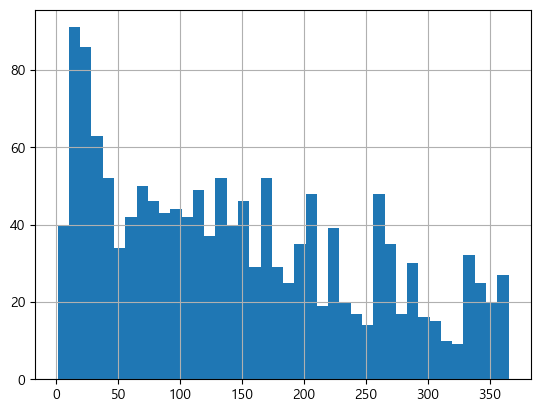

In [ ]:
rfm_df['Recency'].hist(bins=40)

<Axes: >

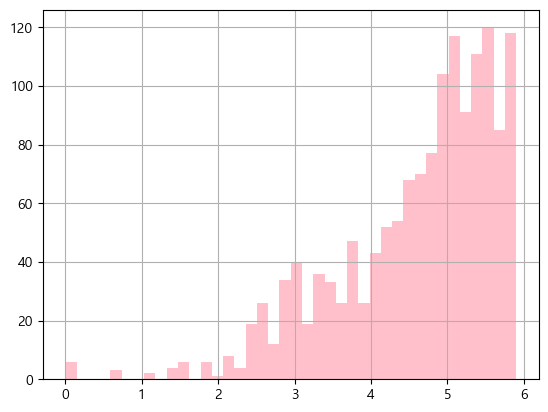

In [ ]:

rfm_df['log_recency'] = np.log(rfm_df['Recency'])
rfm_df['log_recency'].hist(bins=40, color='pink')


<Axes: >

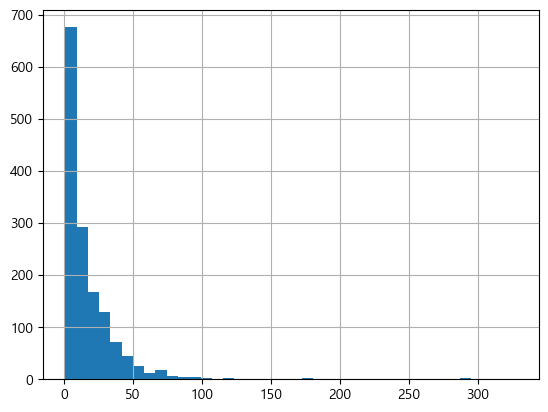

In [ ]:

rfm_df['Frequency'].hist(bins=40)

<Axes: >

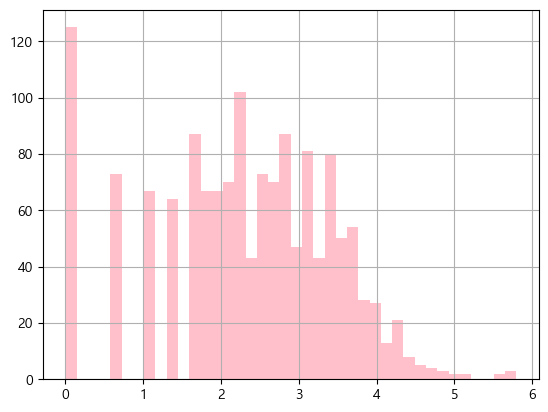

In [ ]:
rfm_df['log_frequency'] = np.log(rfm_df['Frequency'])
rfm_df['log_frequency'].hist(bins=40, color='pink')

<Axes: >

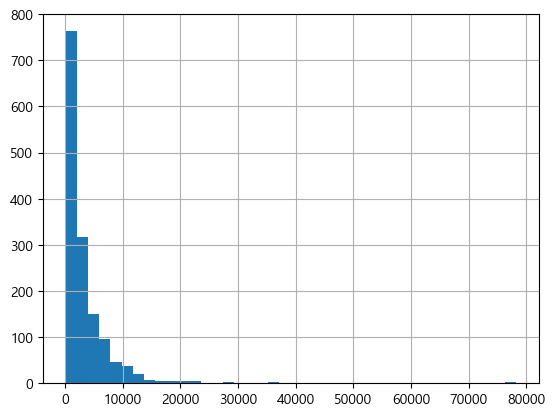

In [ ]:
rfm_df['Monetary'].hist(bins=40)

<Axes: >

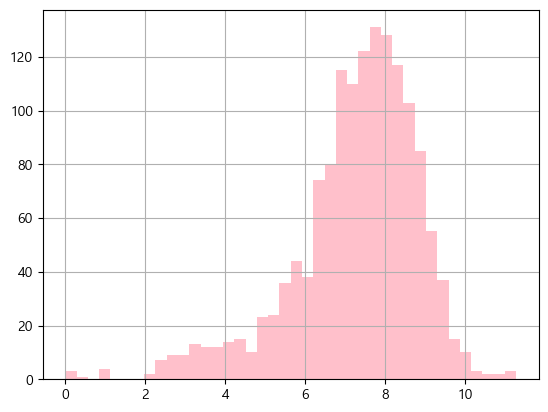

In [ ]:

rfm_df['log_monetary'] = np.log(rfm_df['Monetary'])
rfm_df['log_monetary'].hist(bins=40, color='pink')

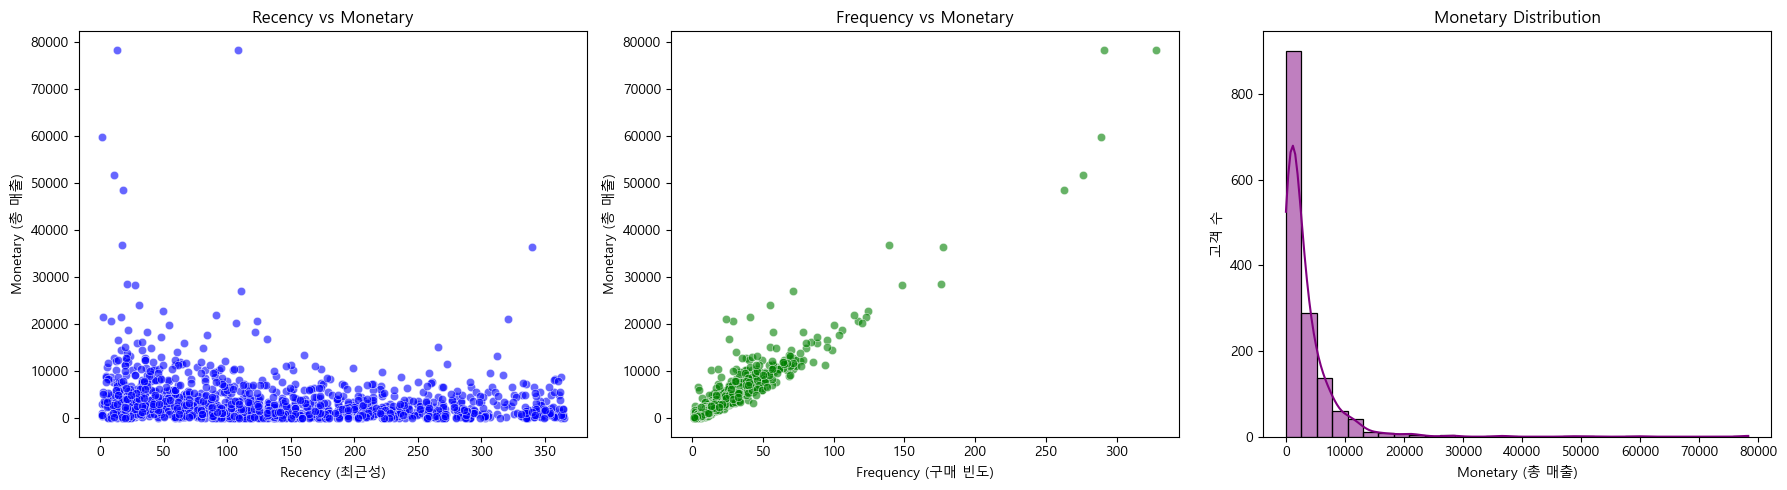

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency vs Monetary
sns.scatterplot(x=rfm_df['Recency'], y=rfm_df['Monetary'], ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title("Recency vs Monetary")
axes[0].set_xlabel("Recency (ÏµúÍ∑ºÏÑ±)")
axes[0].set_ylabel("Monetary (Ï¥ù Îß§Ï∂ú)")

# Frequency vs Monetary
sns.scatterplot(x=rfm_df['Frequency'], y=rfm_df['Monetary'], ax=axes[1], color='green', alpha=0.6)
axes[1].set_title("Frequency vs Monetary")
axes[1].set_xlabel("Frequency (Íµ¨Îß§ ÎπàÎèÑ)")
axes[1].set_ylabel("Monetary (Ï¥ù Îß§Ï∂ú)")

# Monetary ÏûêÏ≤¥ Î∂ÑÌè¨ ÌôïÏù∏
sns.histplot(rfm_df['Monetary'], bins=30, kde=True, ax=axes[2], color='purple')
axes[2].set_title("Monetary Distribution")
axes[2].set_xlabel("Monetary (Ï¥ù Îß§Ï∂ú)")
axes[2].set_ylabel("Í≥†Í∞ù Ïàò")

plt.tight_layout()
plt.show()
